<a href="https://colab.research.google.com/github/tutuponnekanty/machinelearning/blob/main/k_Best_Top_k_Feature_Selection_using_UCI_HAR_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!jupyter nbconvert --ClearMetadataPreprocessor.enabled=True --clear-output --inplace my_notebook.ipynb


# **1. Importing Required Libraries and Modules**

In [ ]:
#importing required ML - Python Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt

In [ ]:
#Rose-Pine-Dawn Matplotlib Module for Visual enhancement and 3D-graphical compatability with seaborn
!wget https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-dawn.mplstyle -qP /tmp
plt.style.use("/tmp/rose-pine-dawn.mplstyle")

In [ ]:
#ignoring the warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
#downloading the datset and loading it into the VM
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip
!unzip -qq UCI\ HAR\ Dataset.zip

In [ ]:
#loading files into the colab
import os
for dirname, _, filenames in os.walk('/content'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/train.csv
/content/test.csv
/content/UCI HAR Dataset.zip
/content/.config/gce
/content/.config/default_configs.db
/content/.config/.last_survey_prompt.yaml
/content/.config/config_sentinel
/content/.config/active_config
/content/.config/.last_update_check.json
/content/.config/.last_opt_in_prompt.yaml
/content/.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
/content/.config/configurations/config_default
/content/.config/logs/2025.04.22/13.37.16.947737.log
/content/.config/logs/2025.04.22/13.37.27.297340.log
/content/.config/logs/2025.04.22/13.37.37.101263.log
/content/.config/logs/2025.04.22/13.36.56.098125.log
/content/.config/logs/2025.04.22/13.37.36.419838.log
/content/.config/logs/2025.04.22/13.37.26.087114.log
/content/UCI HAR Dataset/.DS_Store
/content/UCI HAR Dataset/activity_labels.txt
/content/UCI HAR Dataset/README.txt
/content/UCI HAR Dataset/features_info.txt
/content/UCI HAR Dataset/features.txt
/content/UCI HAR Dataset/train/subject_train.t

In [ ]:
#checking the dataset
df_samp = pd.read_csv("/content/UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt", sep="\s+", header=None)
df_samp.head()

0         1         2         3         4         5         6    \
0  0.000181  0.010139  0.009276  0.005066  0.010810  0.004045  0.004757   
1  0.001094  0.004550  0.002879  0.002247  0.003305  0.002416  0.001619   
2  0.003531  0.002285 -0.000420 -0.003738 -0.006706 -0.003148  0.000733   
3 -0.001772 -0.001311  0.000388  0.000408 -0.000355  0.000998  0.001109   
4  0.000087 -0.000272  0.001022  0.003126  0.002284  0.000885  0.001933   

        7         8         9    ...       118       119       120       121  \
0  0.006214  0.003307  0.007572  ...  0.001412 -0.001509  0.000060  0.000435   
1  0.000981  0.000009 -0.000363  ... -0.000104 -0.000141  0.001333  0.001541   
2  0.000668  0.002162 -0.000946  ...  0.000661  0.001853 -0.000268 -0.000394   
3 -0.003149 -0.008882 -0.010483  ...  0.000458  0.002103  0.001358  0.000820   
4  0.002270  0.002247  0.002175  ...  0.002529  0.003518 -0.000248 -0.002761   

        122       123       124       125       126       127  
0 -0.000819  0.000228 -0.000300 -0.001147 -0.000222  0.001576  
1  0.001077 -0.000736 -0.003767 -0.004646 -0.002941 -0.001599  
2 -0.000279 -0.000316  0.000144  0.001246  0.003117  0.002178  
3 -0.000212 -0.001915 -0.001631 -0.000867 -0.001172 -0.000028  
4  0.000252  0.003752  0.001626 -0.000698 -0.001223 -0.003328  

[5 rows x 128 columns]

In [ ]:
df_samp_test = pd.read_csv("/content/UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt", sep="\s+", header=None)

df_samp_test.head()

0         1         2         3         4         5         6    \
0  0.011653  0.013109  0.011269  0.027831  0.002318 -0.018965 -0.061920   
1  0.009280  0.004930  0.003954  0.009214  0.016156  0.014079  0.013105   
2  0.005732  0.007066  0.005110  0.002434  0.002024  0.001382  0.001930   
3  0.000452  0.000604 -0.002485 -0.004562 -0.006002 -0.006382 -0.005276   
4 -0.004362 -0.002765 -0.004905 -0.004682 -0.000267  0.004135  0.005626   

        7         8         9    ...       118       119       120       121  \
0 -0.094248 -0.079534 -0.070084  ... -0.002944 -0.001247  0.002848  0.002355   
1  0.021247  0.026823  0.031054  ... -0.002533  0.000163 -0.001095 -0.004547   
2  0.004875  0.003776  0.002400  ... -0.004972 -0.003586 -0.003860 -0.003560   
3 -0.001489  0.005153  0.004951  ...  0.001249  0.000978  0.002248  0.003530   
4  0.000933 -0.001542  0.003020  ...  0.003601  0.004918  0.003647  0.002481   

        122       123       124       125       126       127  
0  0.002721  0.003255  0.001301  0.001292  0.001470  0.002574  
1 -0.005310 -0.004094  0.002200  0.007788  0.003433 -0.001239  
2 -0.000974  0.001052  0.000778 -0.000743 -0.001923 -0.004305  
3 -0.000117 -0.003275 -0.001325  0.000597 -0.000246 -0.000269  
4  0.004855  0.006754  0.004633  0.002157 -0.000869 -0.001329  

[5 rows x 128 columns]

# **2. Accumilating the Dataset into one Array**

In [ ]:

f = open("/content/UCI HAR Dataset/README.txt", "r", encoding="latin-1")
print(f.read())
f.close()

Human Activity Recognition Using Smartphones Dataset
Version 1.0
Jorge L. Reyes-Ortiz(1,2), Davide Anguita(1), Alessandro Ghio(1), Luca Oneto(1) and Xavier Parra(2)
1 - Smartlab - Non-Linear Complex Systems Laboratory
DITEN - Università  degli Studi di Genova, Genoa (I-16145), Italy. 
2 - CETpD - Technical Research Centre for Dependency Care and Autonomous Living
Universitat Politècnica de Catalunya (BarcelonaTech). Vilanova i la Geltrú (08800), Spain
activityrecognition '@' smartlab.ws 

The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained data

In [ ]:
def load_file(filepath):
    df = pd.read_csv(filepath, header=None, delim_whitespace=True)
    return df.values

In [ ]:
def load_group(files, prefix=''):
    loaded = list()
    for f in files:
        data = load_file(prefix + f)
        loaded.append(data)
    loaded = np.dstack(loaded)
    return loaded

In [ ]:
def load_dataset_group(group, prefix='/content/UCI HAR Dataset/'):
    filepath = prefix + group + '/Inertial Signals/'
    files = list()
    files += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    files += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    files += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    X = load_group(files, filepath)
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y

In [ ]:
def load_dataset(prefix='/content/UCI HAR Dataset/'):
    X_train, y_train = load_dataset_group('train', prefix)
    X_test, y_test = load_dataset_group('test', prefix)
    print(f"""Dataset loaded.
Training Set:
X_train {X_train.shape} y_train {y_train.shape}
Test Set:
X_test {X_test.shape} y_test {y_test.shape}""")
    return X_train, y_train, X_test, y_test

In [ ]:
X_train, y_train, X_test, y_test = load_dataset()

Dataset loaded.
Training Set:
X_train (7352, 128, 9) y_train (7352, 1)
Test Set:
X_test (2947, 128, 9) y_test (2947, 1)


In [ ]:
activity = {
        1: 'Walking',
        2: 'Walking Upstairs',
        3: 'Walking Downstairs',
        4: 'Sitting',
        5: 'Standing',
        6: 'Laying'}
def activities(obs):
    return activity[int(y_train[obs])]

In [ ]:
def features(feature):
    f={"Body acceleration": 0, "Gyro": 1, "Total acceleration": 2}
    return f[feature]

In [ ]:
sample=[777, 666, 818, 0,6666,66]
[activity[int(y_train[i])] for i in sample]

<ipython-input-16-58dd837be98b>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  [activity[int(y_train[i])] for i in sample]


['Walking',
 'Walking Upstairs',
 'Walking Downstairs',
 'Standing',
 'Sitting',
 'Laying']

# **3. EDA**

In [ ]:
def get_values(y_values, T, N, f_s, sample_rate):
    y_values = y_values
    x_values = [sample_rate * kk for kk in range(0,len(y_values))]
    return x_values, y_values

In [ ]:
def signal_viz(obs):
    N = 128  # number of timesteps
    f_s = 50  # overlapped percentage
    t_n = 2.56  # time
    T = t_n / N
    sample_rate = 1 / f_s

    labels = ['x-component', 'y-component', 'z-component']
    colors = ['#eb6f92', '#9ccfd8', '#f6c177']  # Soft Rose Pine palette (red, cyan, gold)
    suptitle = "Different signals for the activity: {}"
    xlabel = 'Time [sec]'
    ylabel = 'Amplitude'
    axtitles = ['Body acceleration', 'Gyro', 'Total acceleration']
    activity_name = activities(obs)

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))
    fig.patch.set_facecolor('#faf4ed')  # Rose Pine Dawn background

    for comp_no in range(0, 9):
        col_no = comp_no // 3
        plot_no = comp_no % 3
        color = colors[plot_no]
        label = labels[plot_no]
        axtitle = axtitles[col_no]

        ax = axes[col_no]
        ax.set_title(axtitle, fontsize=16)
        ax.set_xlabel(xlabel, fontsize=14)
        ax.set_facecolor('#faf4ed')  # Light background for axes
        ax.grid(True, color='#e0def4', linestyle='--', linewidth=0.5, alpha=0.7)

        if col_no == 0:
            ax.set_ylabel(ylabel, fontsize=14)

        signal_component = X_train[obs][:, comp_no]
        x_values, y_values = get_values(signal_component, T, N, f_s, sample_rate)
        ax.plot(x_values, y_values, linestyle='-', color=color, label=label, linewidth=1.8)

        if col_no == 2:
            ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

    fig.suptitle(suptitle.format(activity_name), fontsize=20, weight='bold')
    plt.tight_layout()
    plt.subplots_adjust(top=0.88, hspace=0.4)
    plt.show()


<ipython-input-14-a4433ab38d3d>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return activity[int(y_train[obs])]


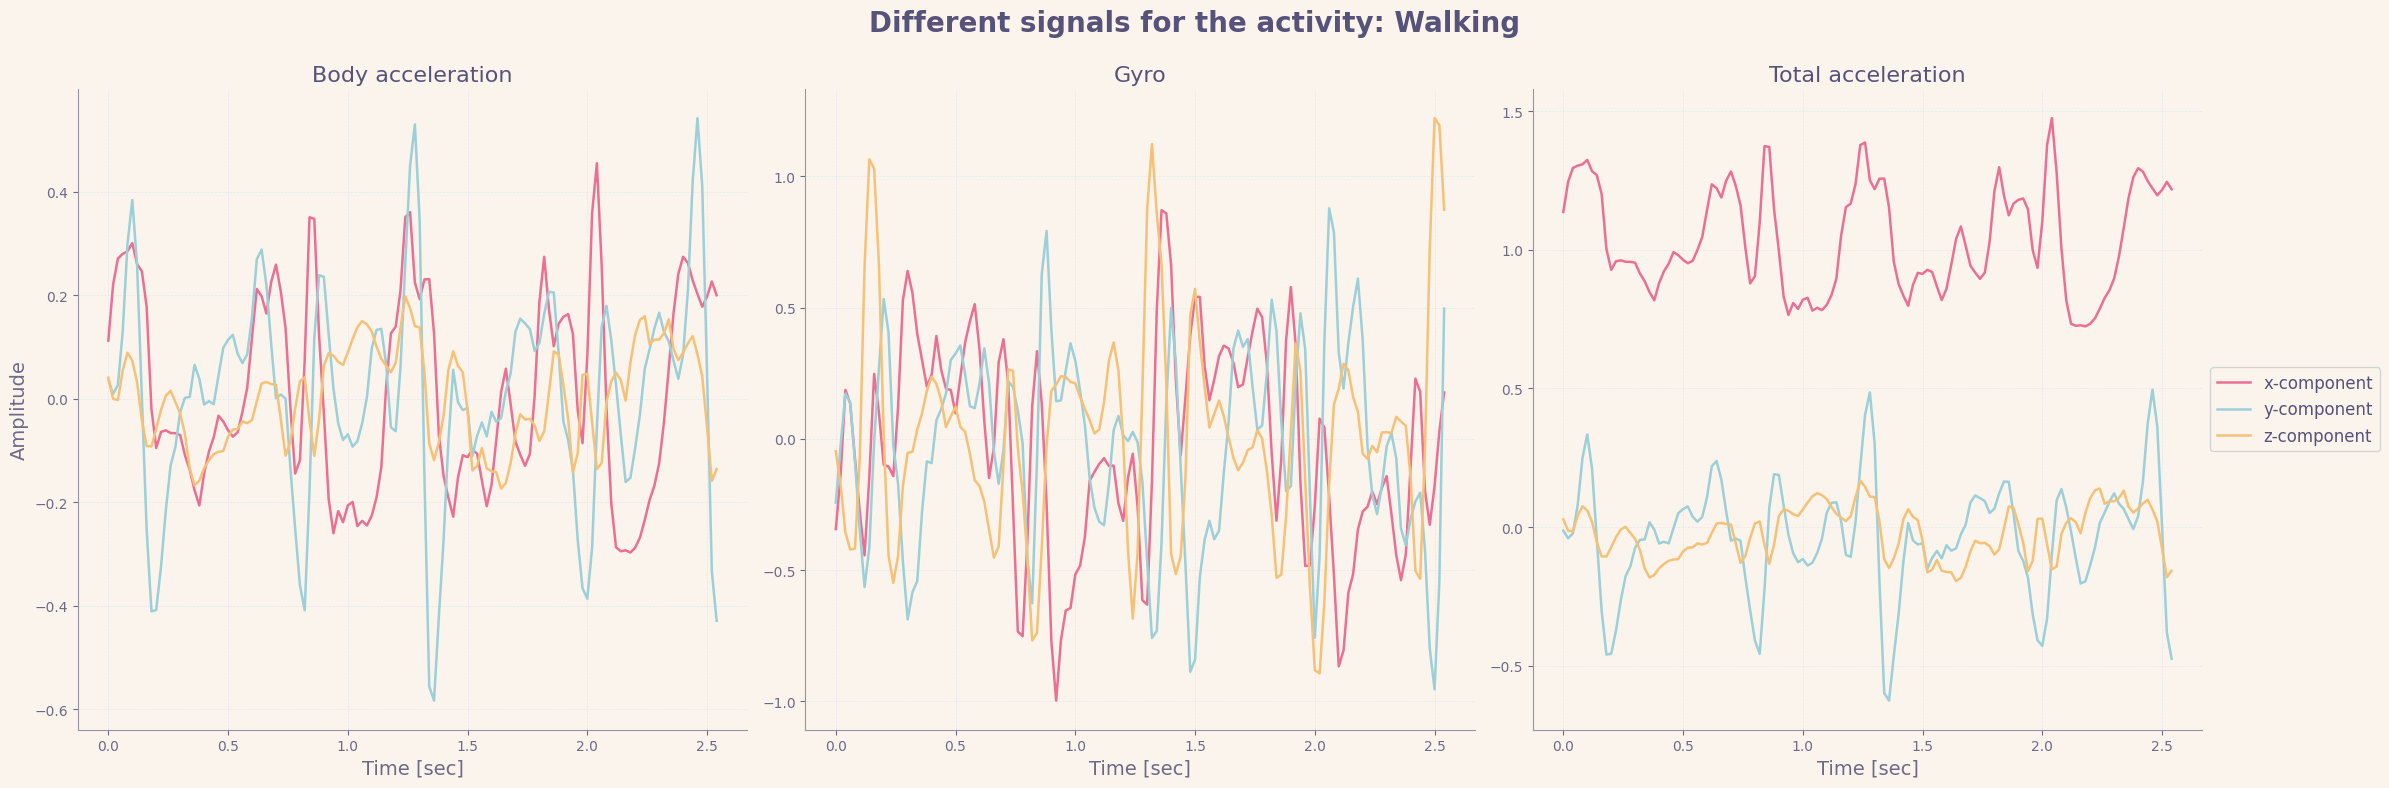

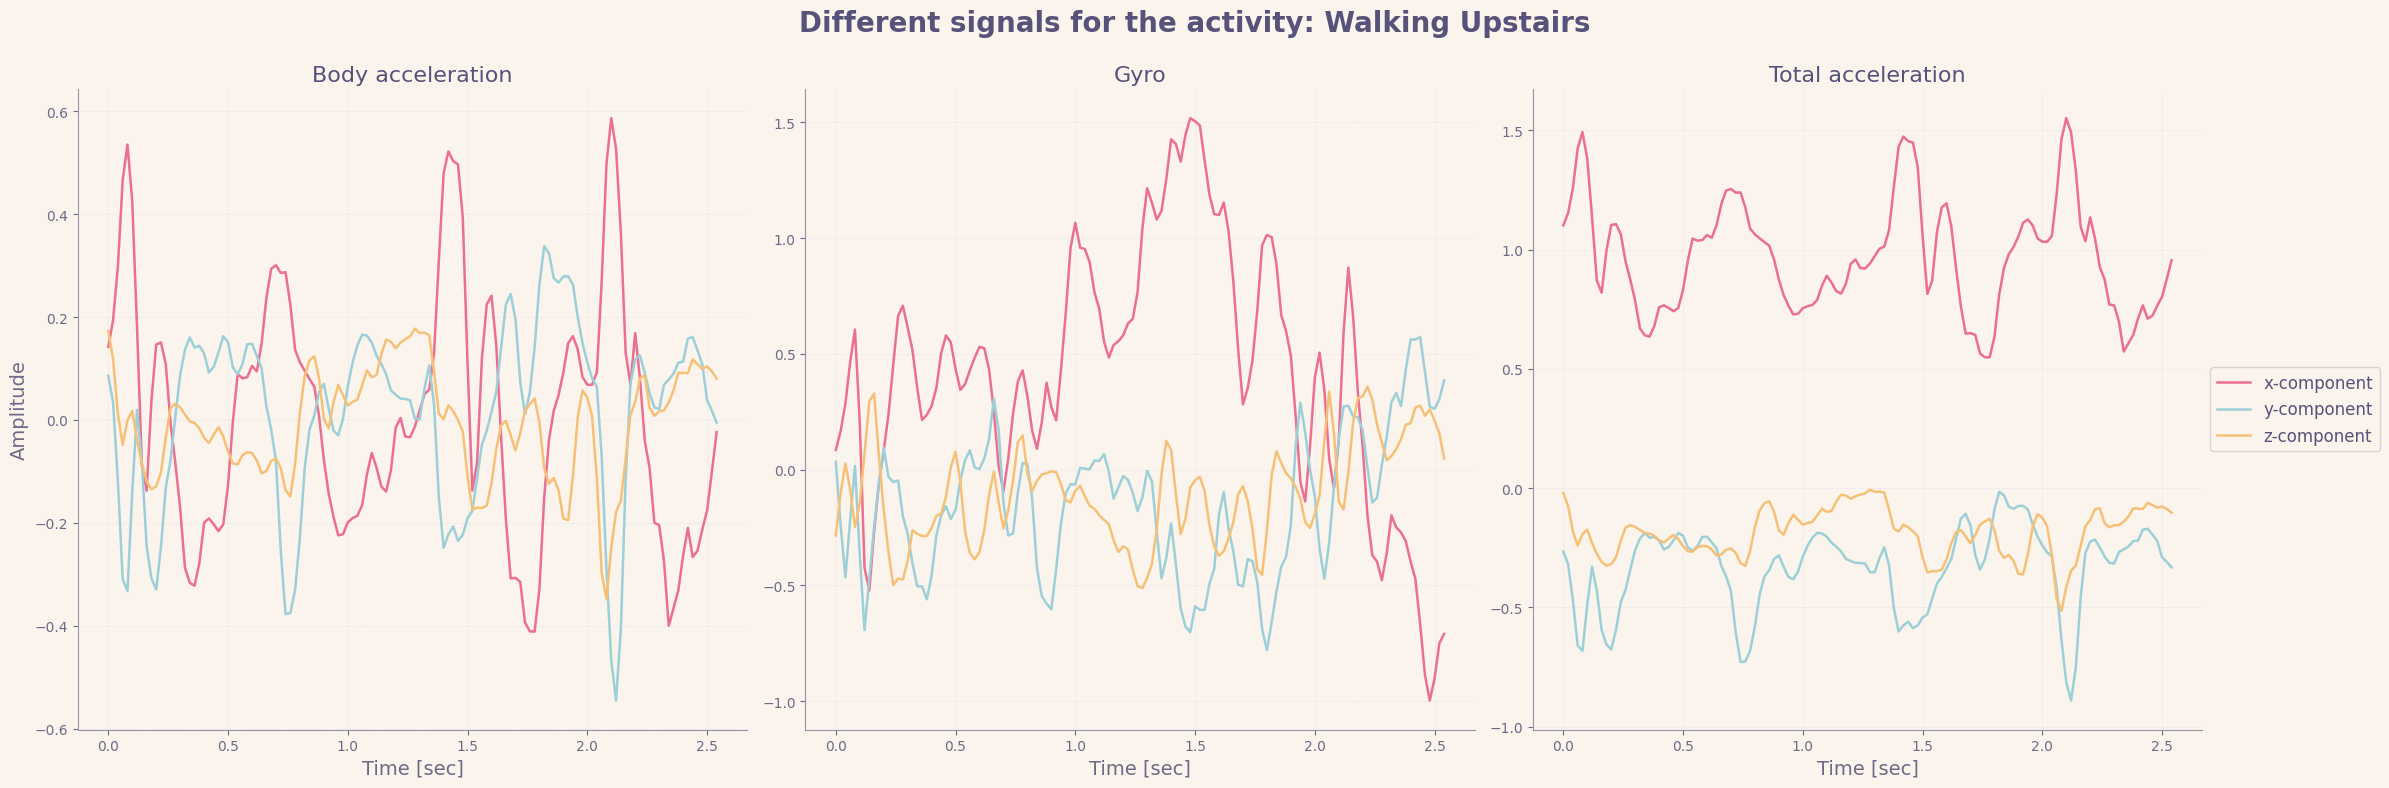

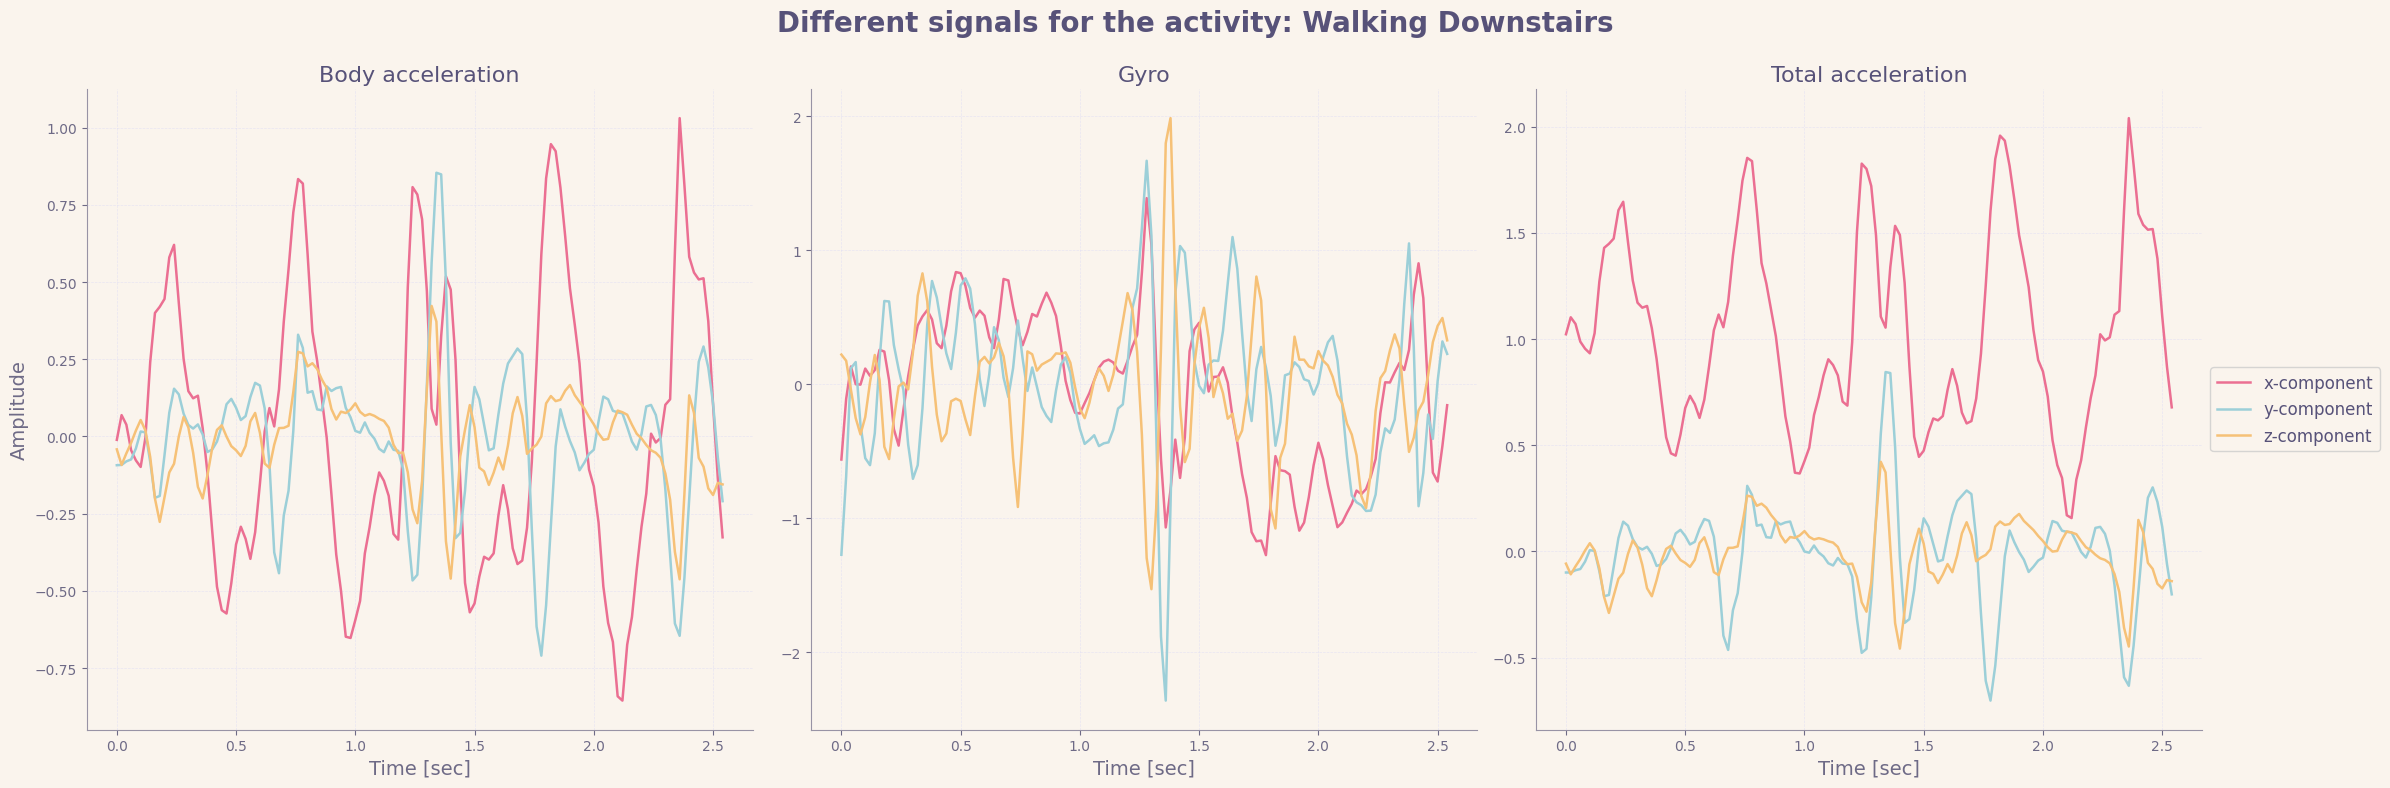

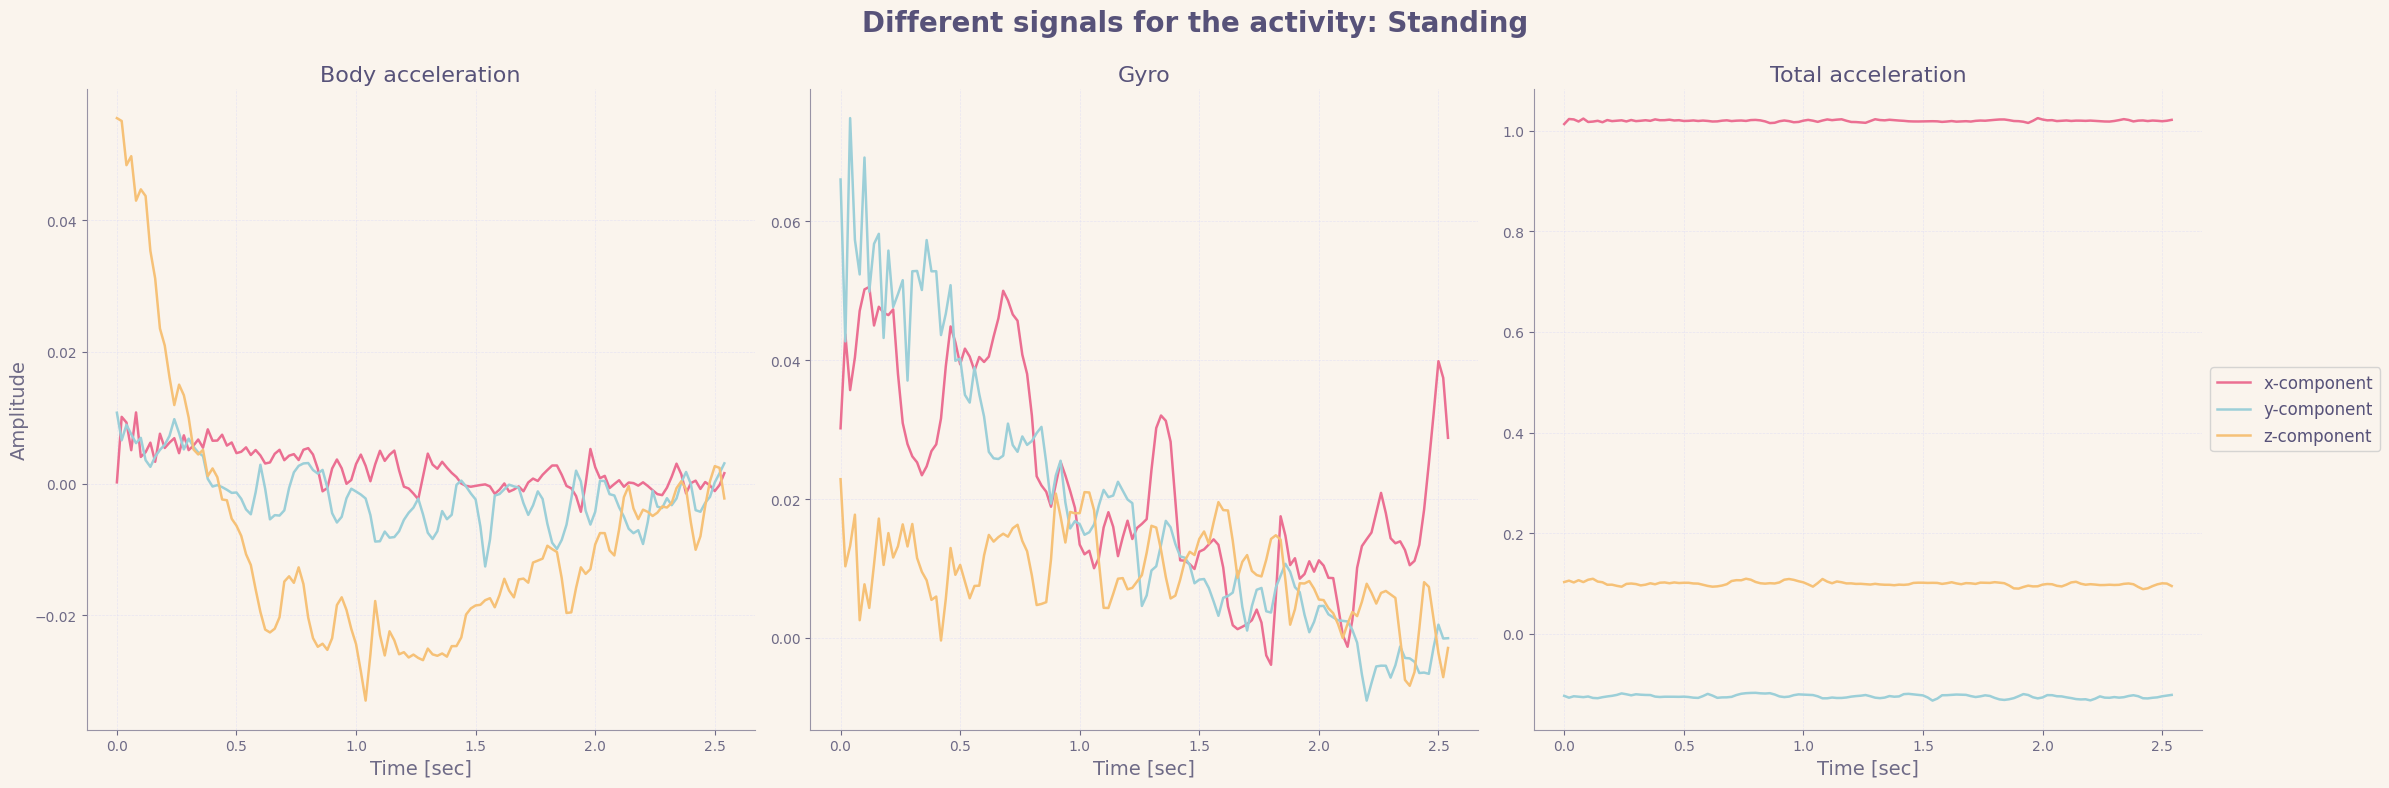

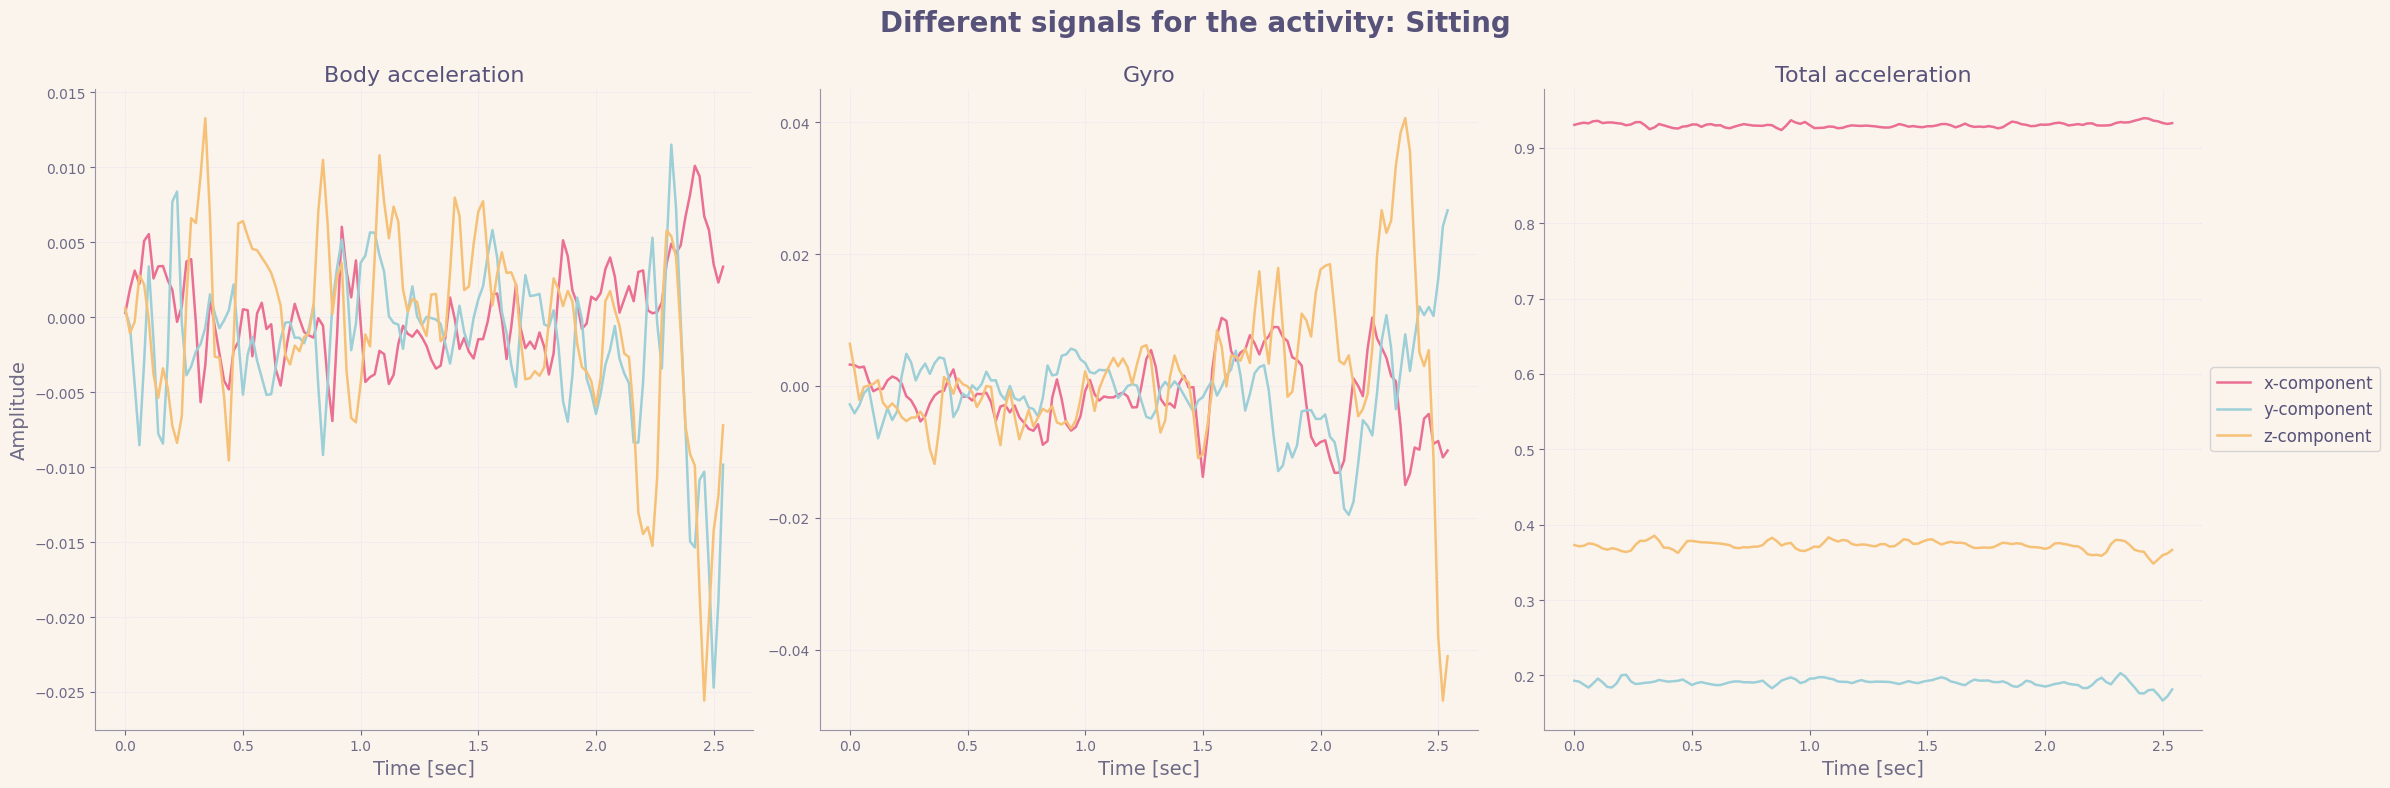

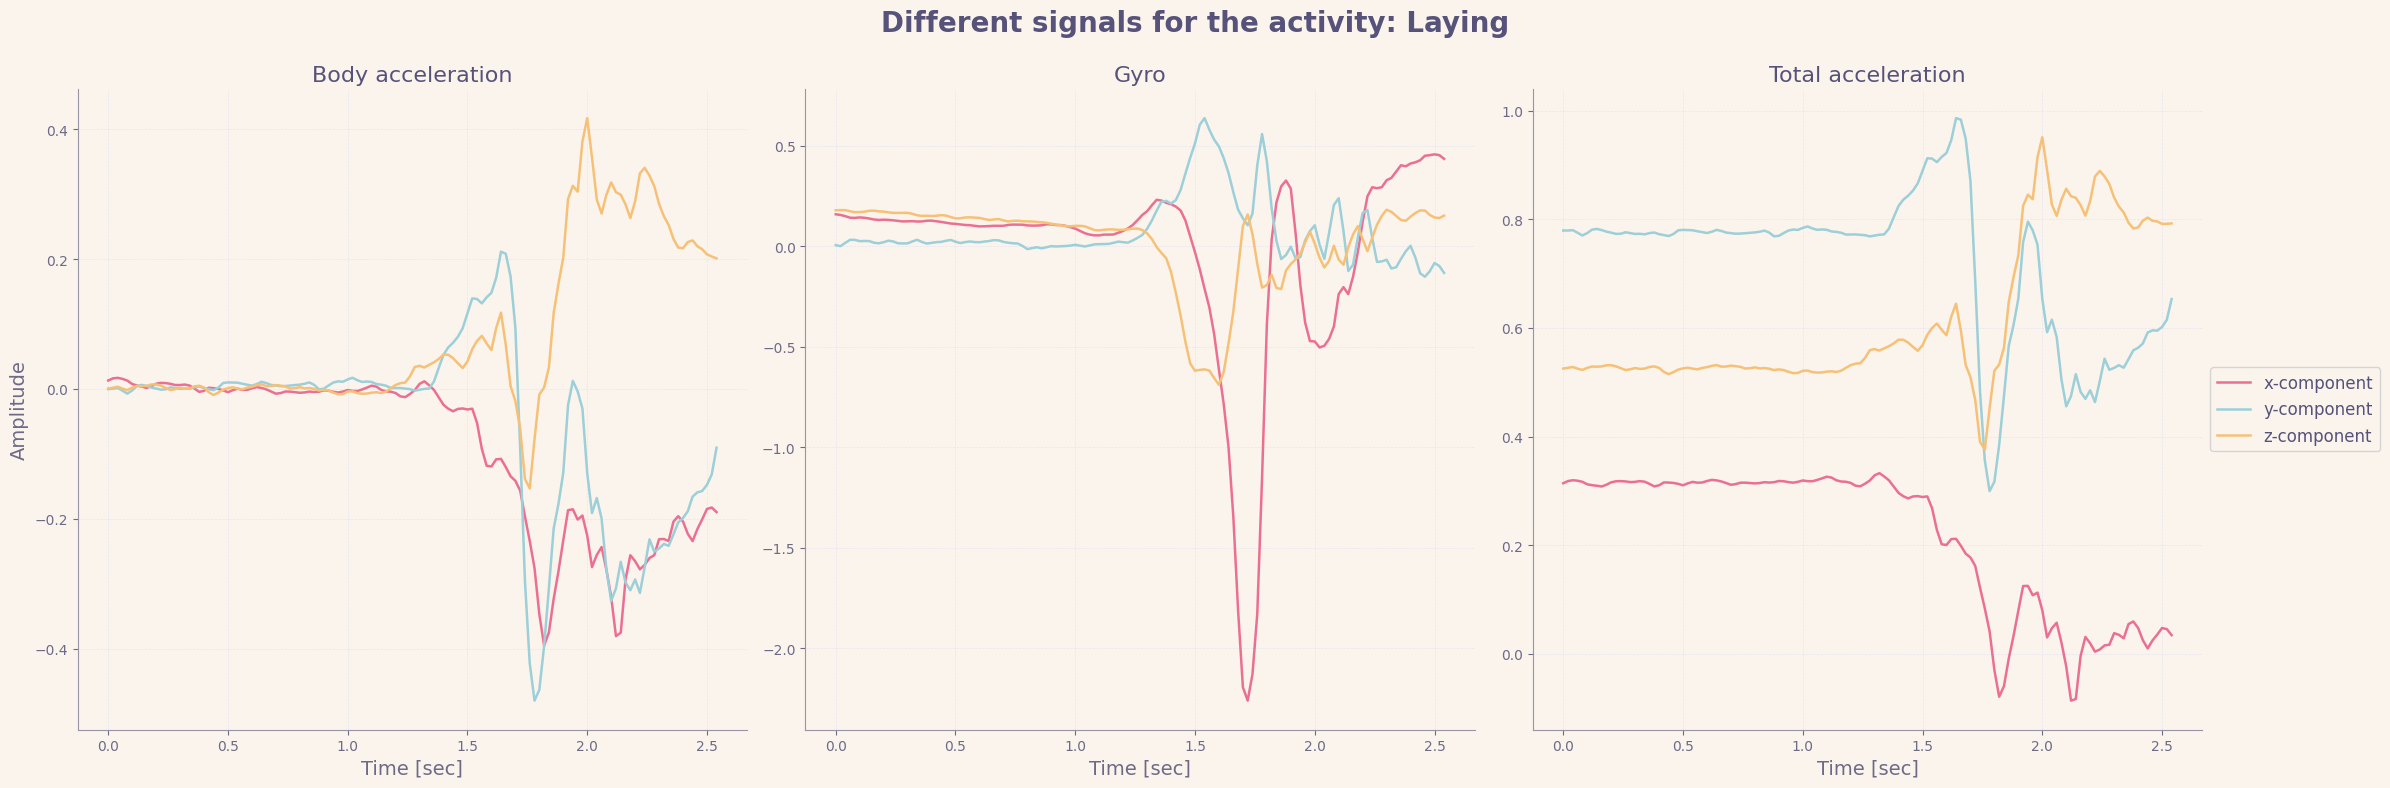

In [ ]:
for i in sample:
    signal_viz(i)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

# Apply Rose Pine Dawn styling
sns.set_theme(style="whitegrid", font_scale=1.8)

def signal_3dviz(obs, feature):
    # Assuming `activities()` returns the activity name and `features()` gives the index
    activity_name = activities(obs)
    i = features(feature)

    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111, projection="3d")
    fig.patch.set_facecolor('#faf4ed')  # Background to match style

    # Extract 3D components
    x = X_train[obs][:, i * 3 + 0]
    y = X_train[obs][:, i * 3 + 1]
    z = X_train[obs][:, i * 3 + 2]

    # Use a soft color from Rose Pine palette
    ax.plot(x, y, z, color="#eb6f92", label=feature, linewidth=2.5)

    # Labels and title
    ax.set_title(activity_name, fontsize=20, weight='bold')
    ax.set_xlabel("X", fontsize=16)
    ax.set_ylabel("Y", fontsize=16)
    ax.set_zlabel("Z", fontsize=16)

    # Make axes planes transparent
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

    # Remove grid lines for a minimal look
    ax.grid(False)

    # Style ticks
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.tick_params(axis='z', labelsize=12)

    # Legend
    ax.legend(fontsize=14)

    plt.show()


<ipython-input-14-a4433ab38d3d>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return activity[int(y_train[obs])]


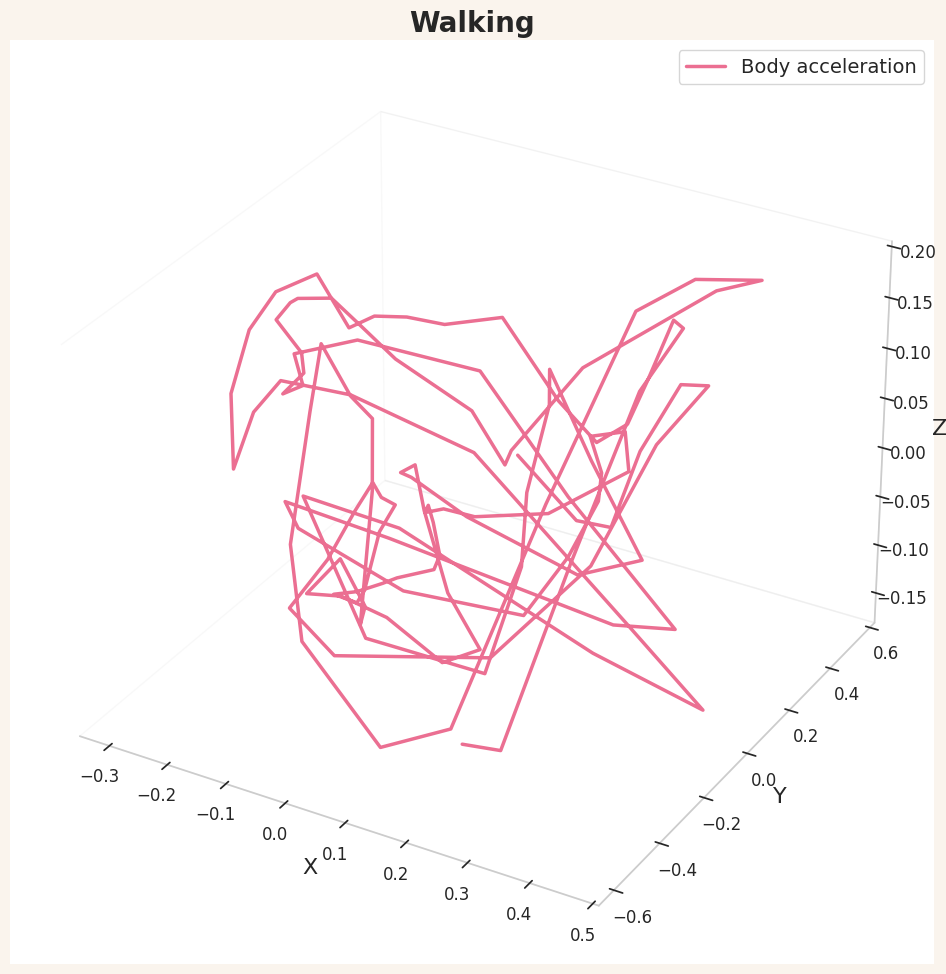

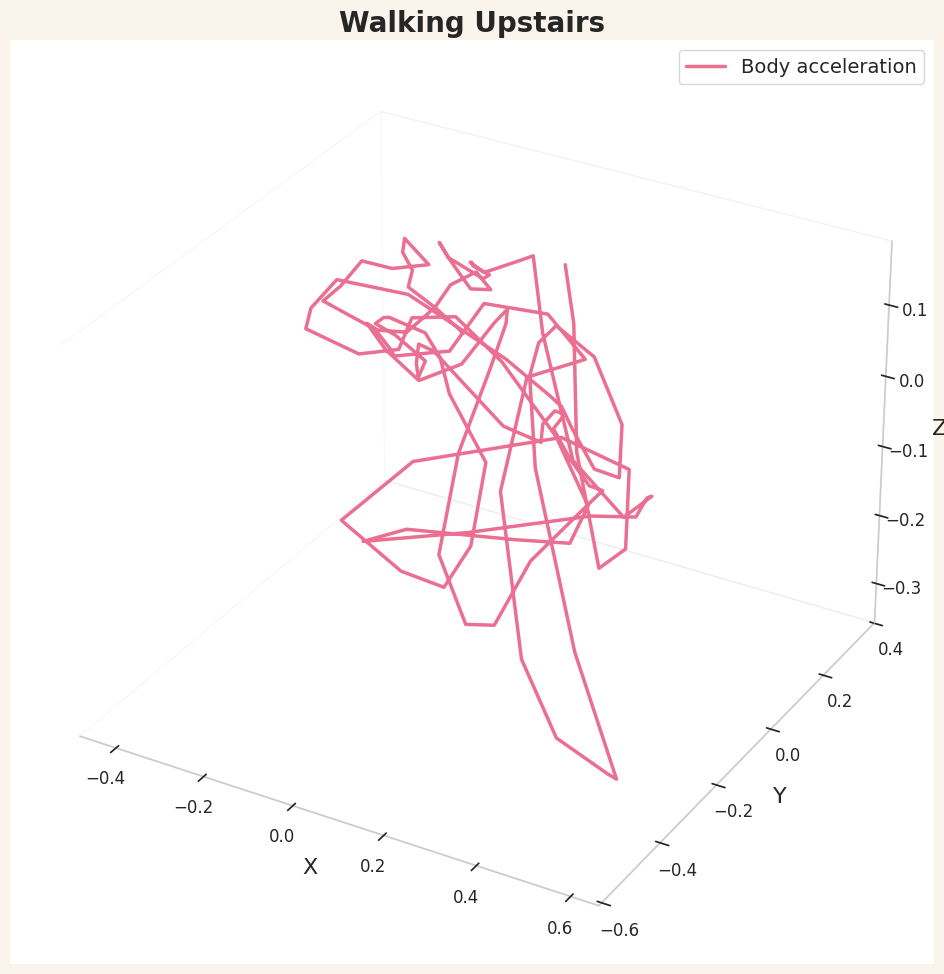

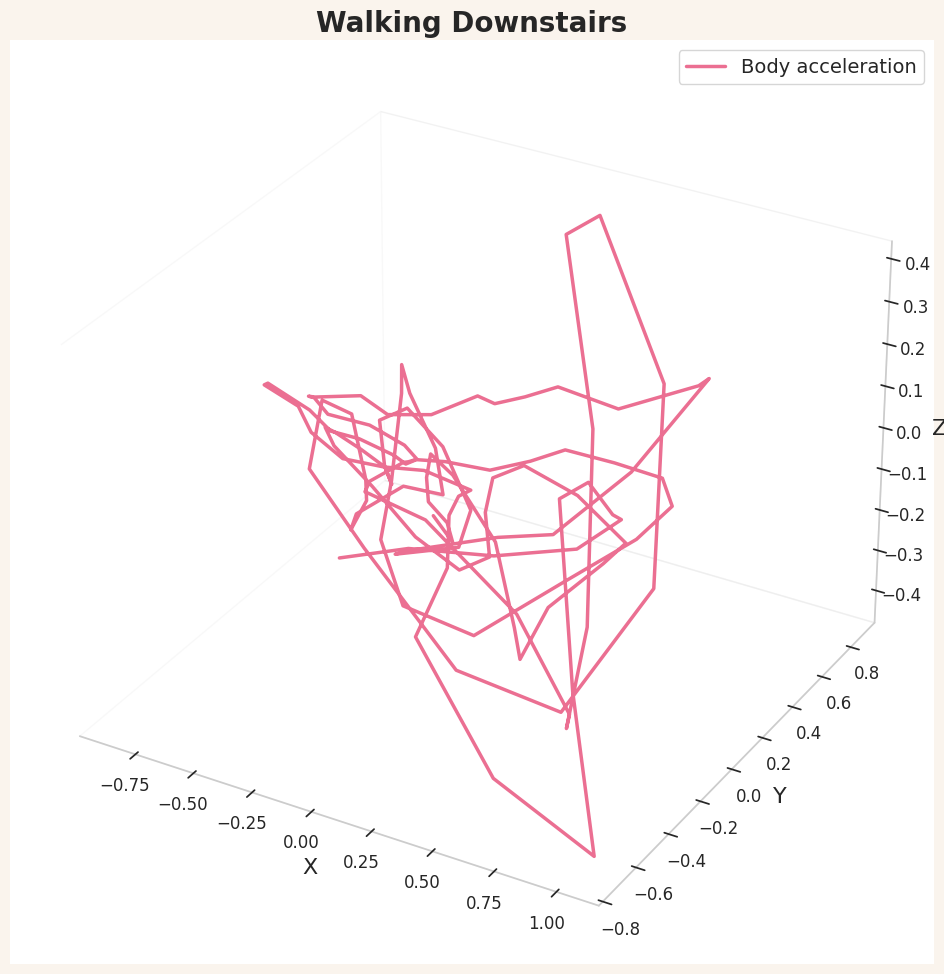

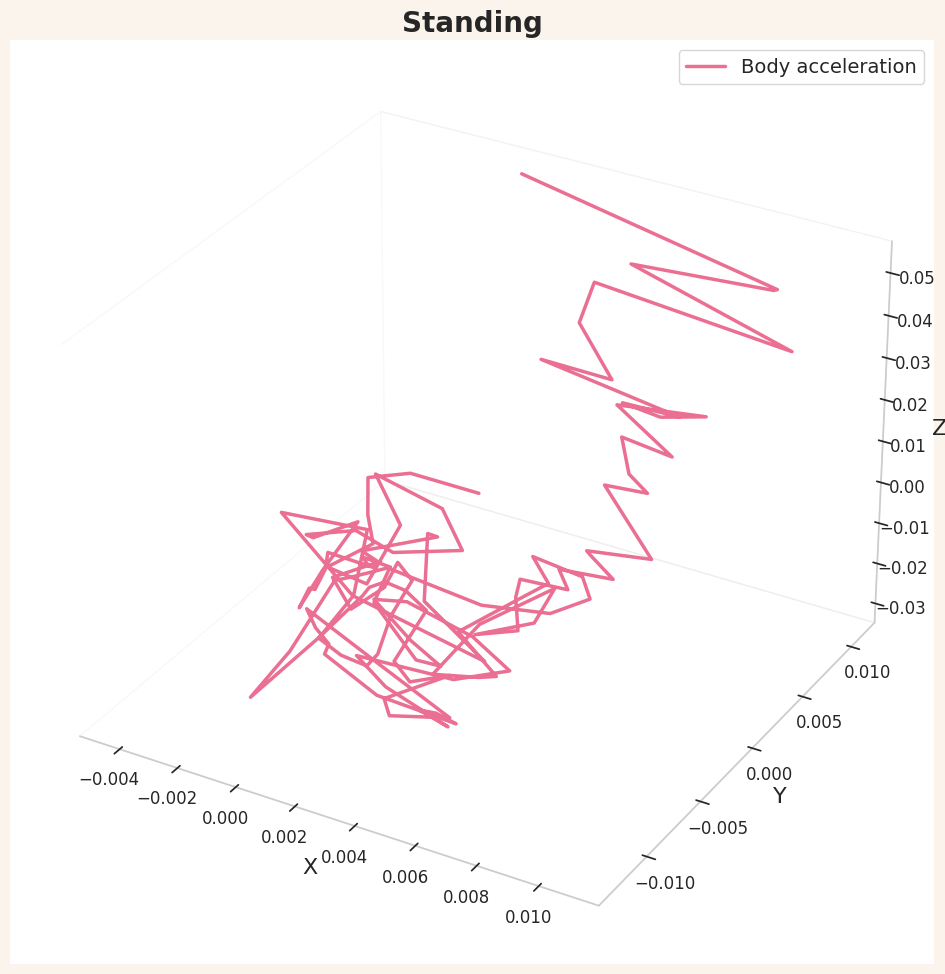

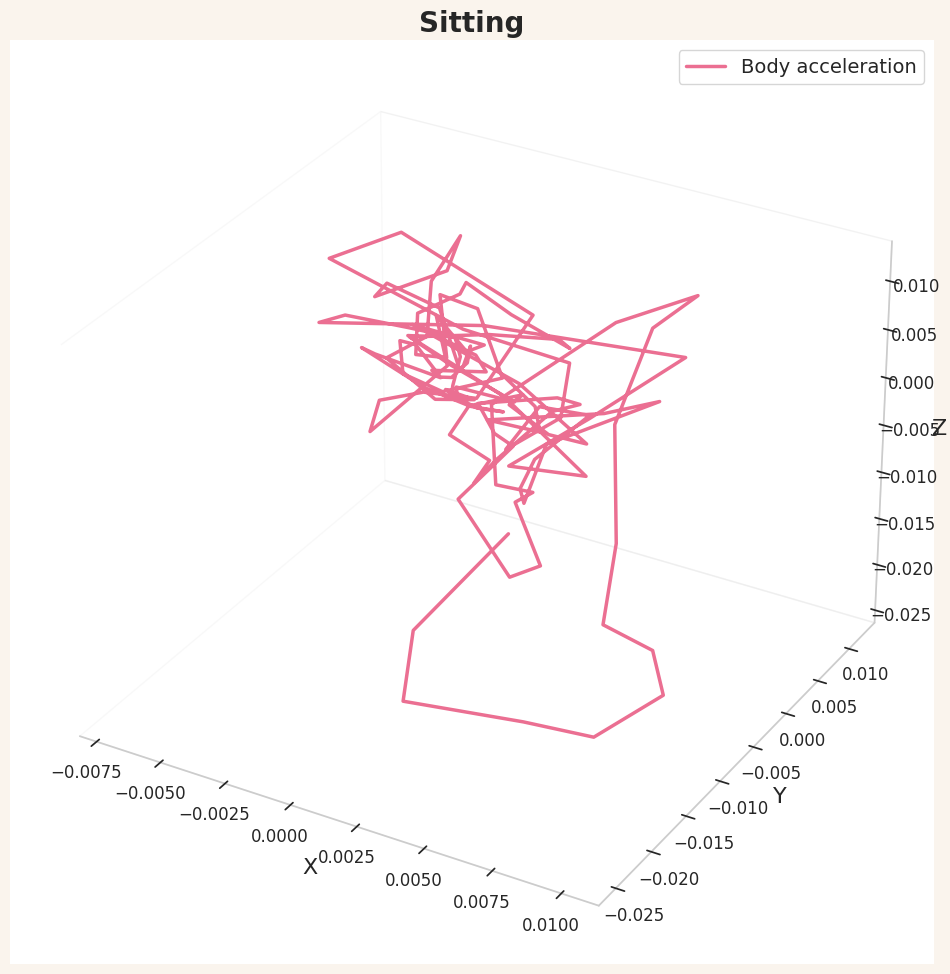

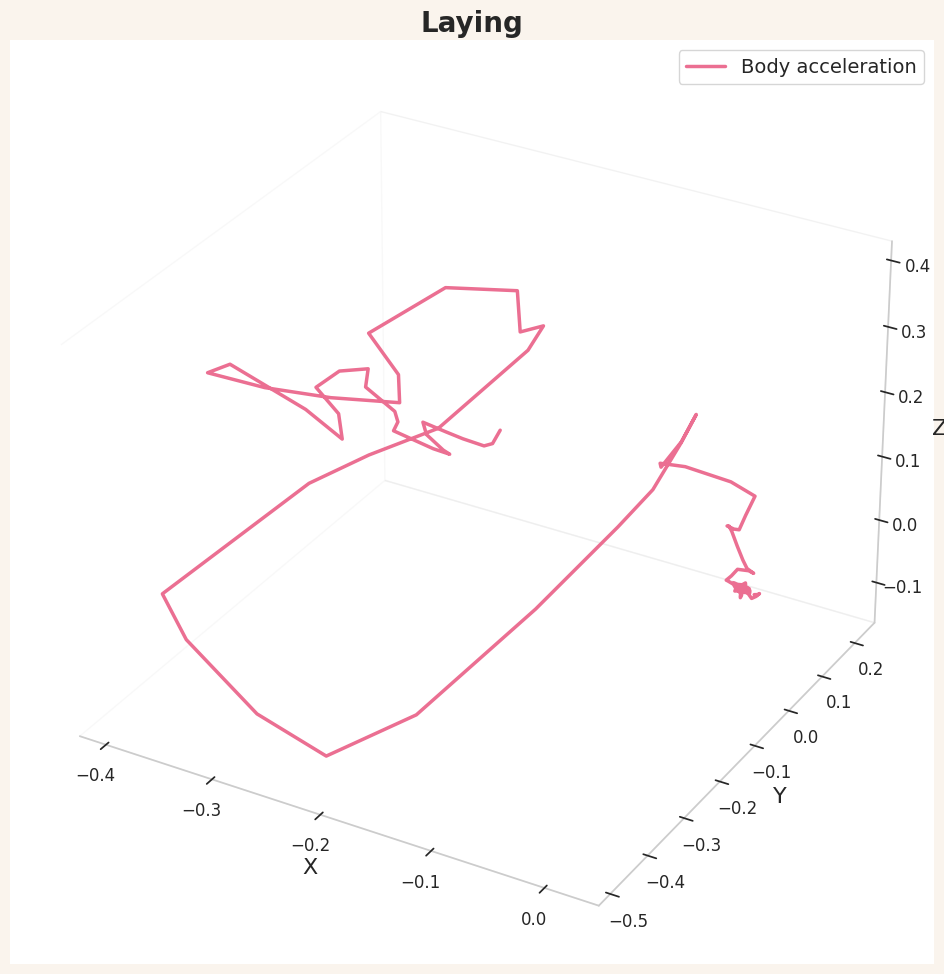

In [ ]:
for i in sample:
    signal_3dviz(i, "Body acceleration")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

# Apply Rose Pine Dawn styling
sns.set_theme(style="whitegrid", font_scale=1.8)

def signal_3dviz(obs, feature):
    # Assuming `activities()` returns the activity name and `features()` gives the index
    activity_name = activities(obs)
    i = features(feature)

    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111, projection="3d")
    fig.patch.set_facecolor('#faf4ed')  # Background to match style

    # Extract 3D components
    x = X_train[obs][:, i * 3 + 0]
    y = X_train[obs][:, i * 3 + 1]
    z = X_train[obs][:, i * 3 + 2]

    # Use a soft color from Rose Pine palette
    ax.plot(x, y, z, color="#eb6f92", label=feature, linewidth=2.5)

    # Labels and title
    ax.set_title(activity_name, fontsize=20, weight='bold')
    ax.set_xlabel("X", fontsize=16)
    ax.set_ylabel("Y", fontsize=16)
    ax.set_zlabel("Z", fontsize=16)

    # Make axes planes transparent
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

    # Remove grid lines for a minimal look
    ax.grid(False)

    # Style ticks
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.tick_params(axis='z', labelsize=12)

    # Legend
    ax.legend(fontsize=14)

    plt.show()


<ipython-input-14-a4433ab38d3d>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return activity[int(y_train[obs])]


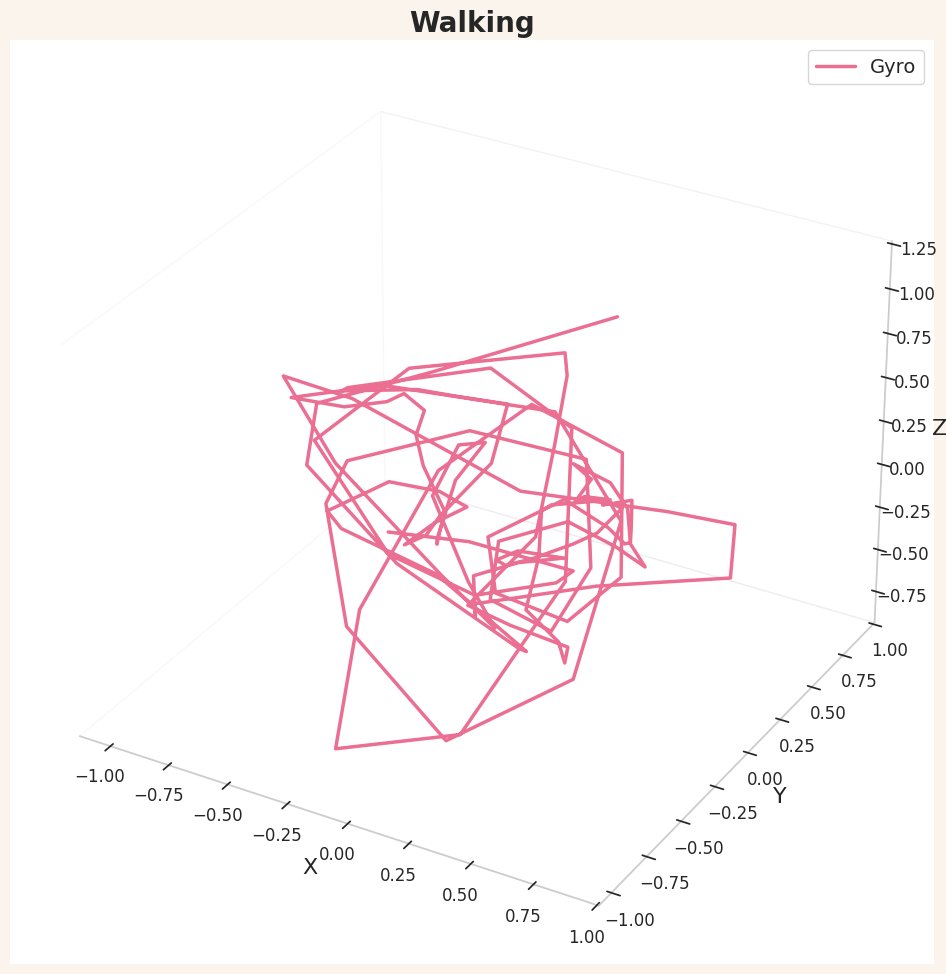

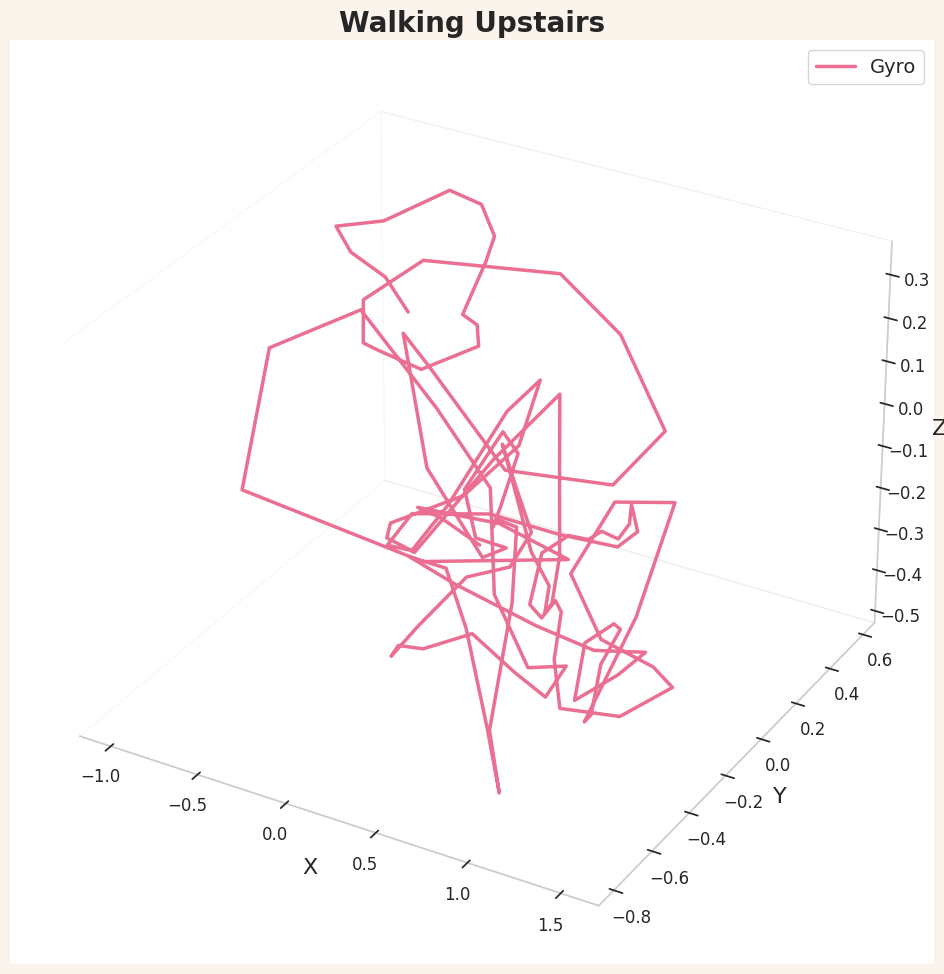

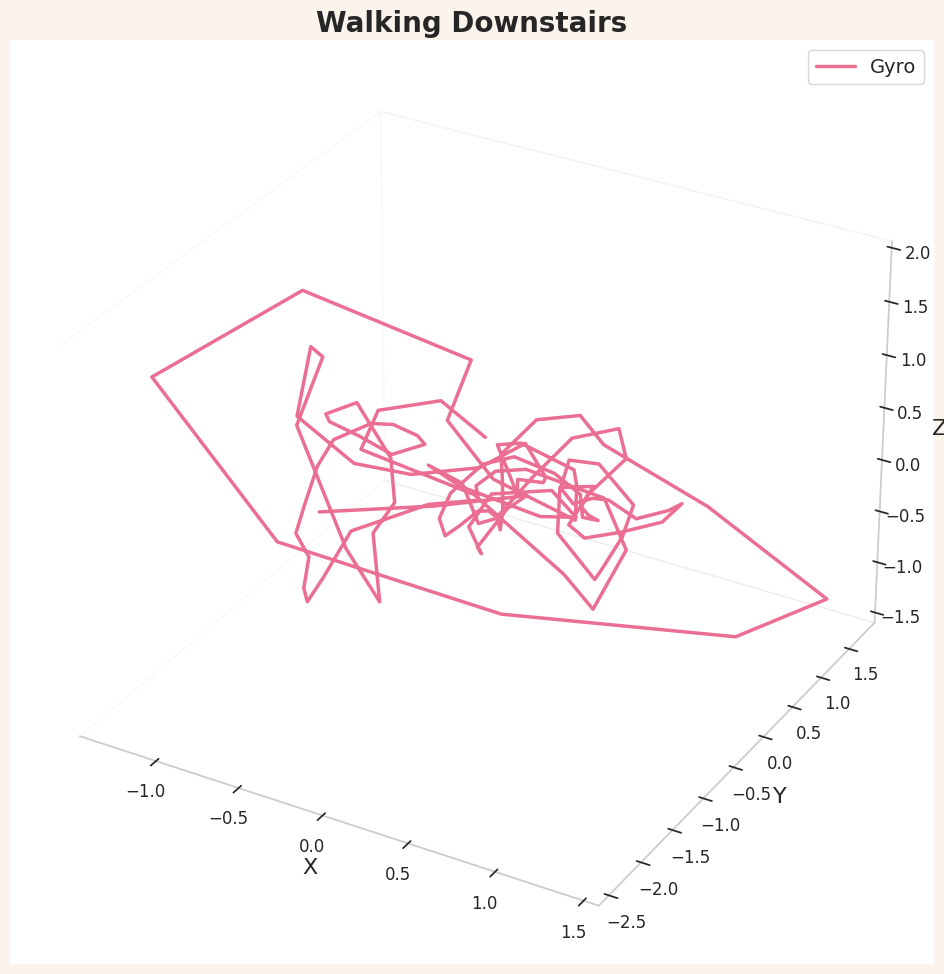

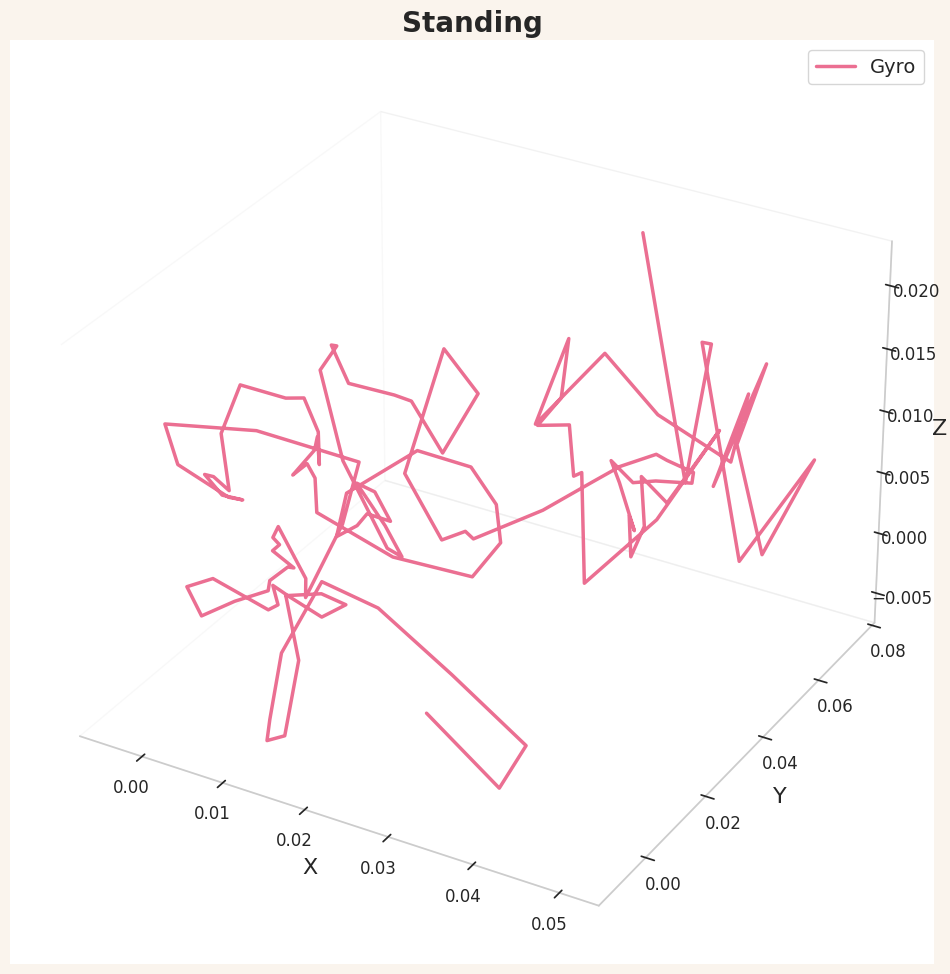

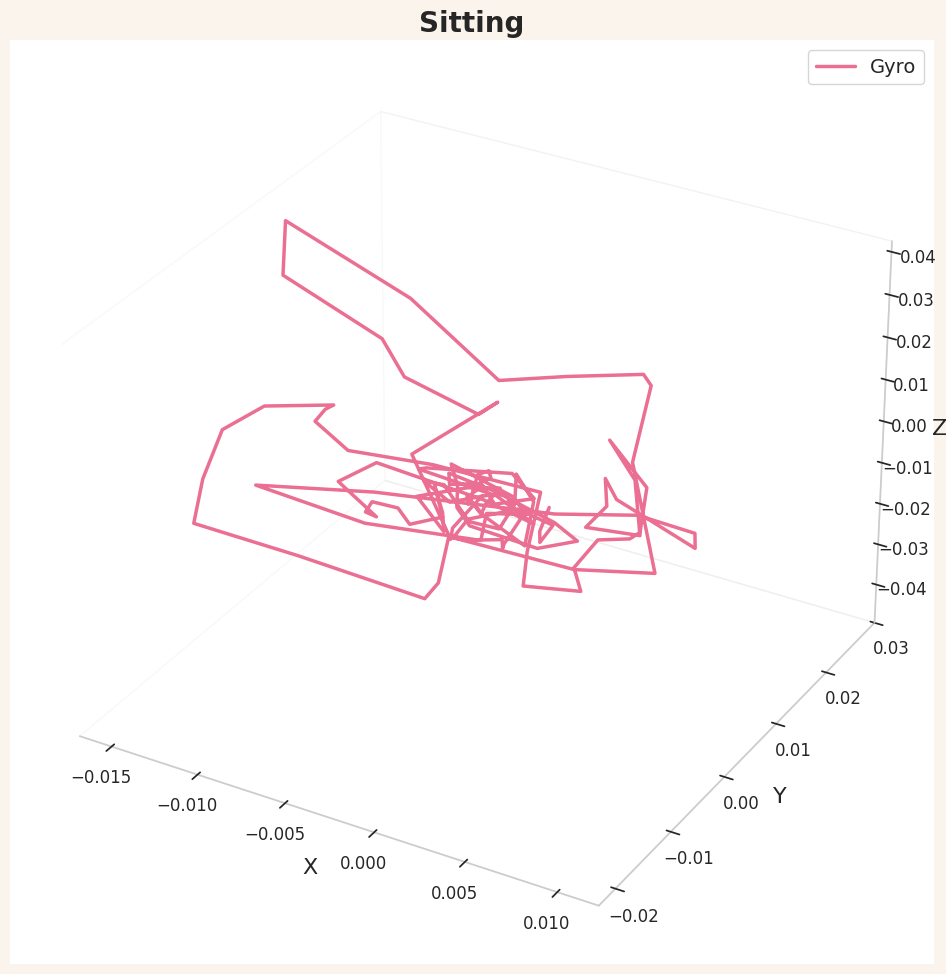

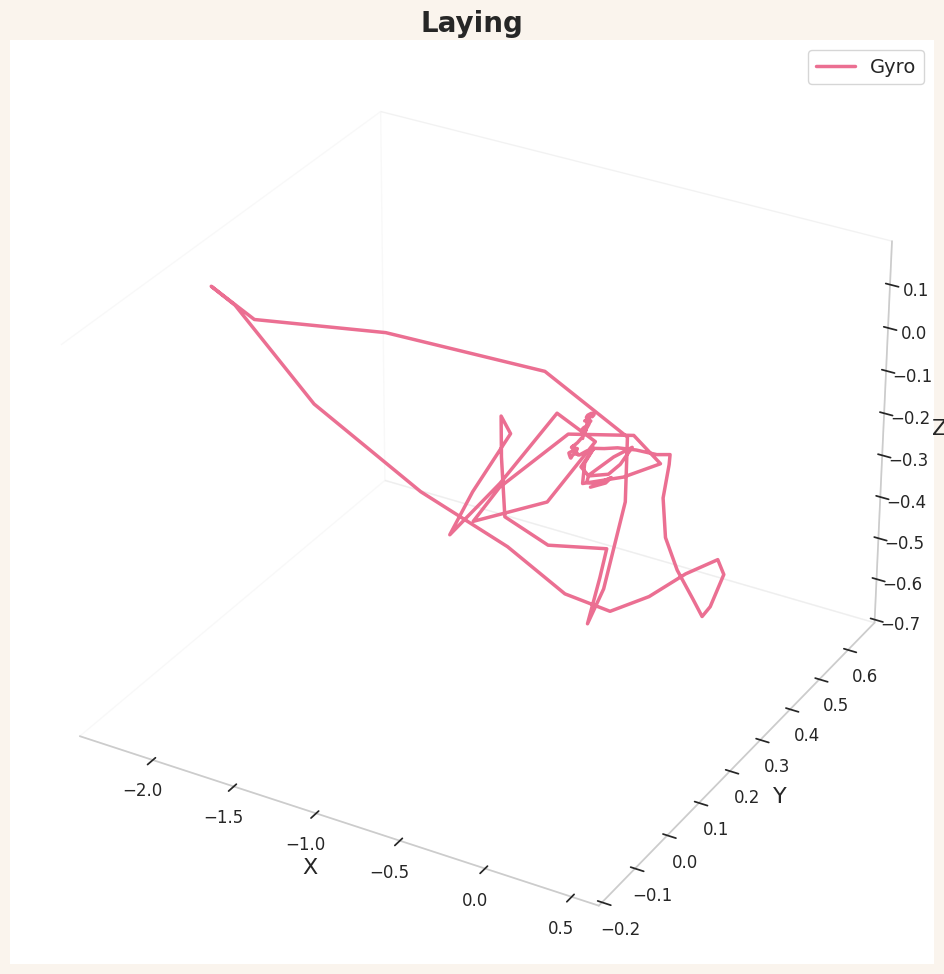

In [ ]:
for i in sample:
    signal_3dviz(i, "Gyro")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Apply Rose Pine Dawn style globally
sns.set_theme(style="white", font_scale=1.8)

def distance_viz(obs, feature):
    graph_name = "graph/distance {} {}.png"
    activity_name = activities(obs)

    i = features(feature)

    fig = plt.figure(figsize=(10, 6))
    fig.patch.set_facecolor('#faf4ed')  # Rose Pine Dawn background

    # Extract components
    x = X_train[obs][:, i * 3 + 0]
    y = X_train[obs][:, i * 3 + 1]
    z = X_train[obs][:, i * 3 + 2]

    # Calculate Euclidean distance
    distance = (x**2 + y**2 + z**2)**0.5

    # Plot with soft, warm Rose Pine color
    plt.plot(distance, label=feature, color="#eb6f92", linewidth=2.2)

    # Labels and title
    plt.title(activity_name, fontsize=20, weight='bold')
    plt.xlabel("Timesteps", fontsize=16)
    plt.ylabel("Distance", fontsize=16)

    # Legend
    plt.legend(fontsize=14)

    # Ticks styling
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Optional: Remove top and right spines for minimalism
    sns.despine()

    plt.tight_layout()
    plt.show()


<ipython-input-14-a4433ab38d3d>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return activity[int(y_train[obs])]


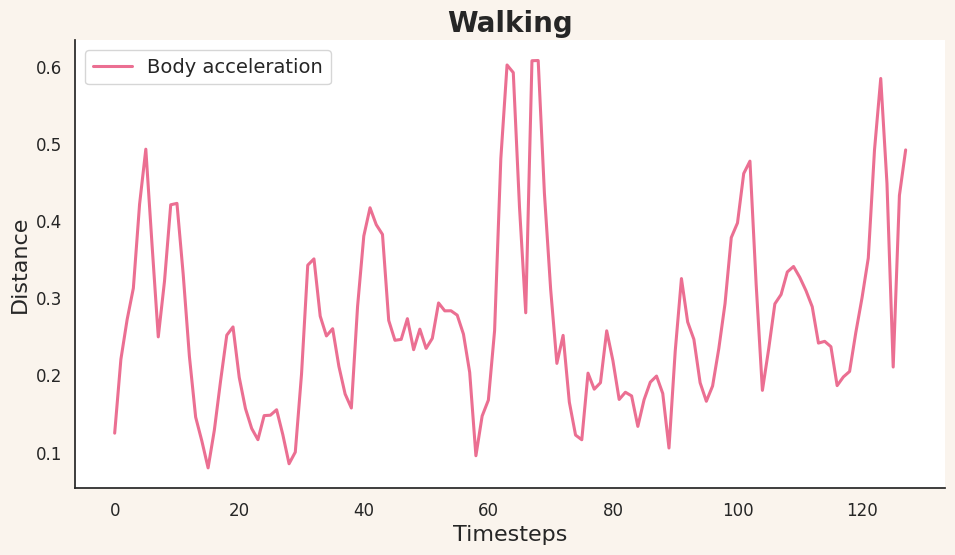

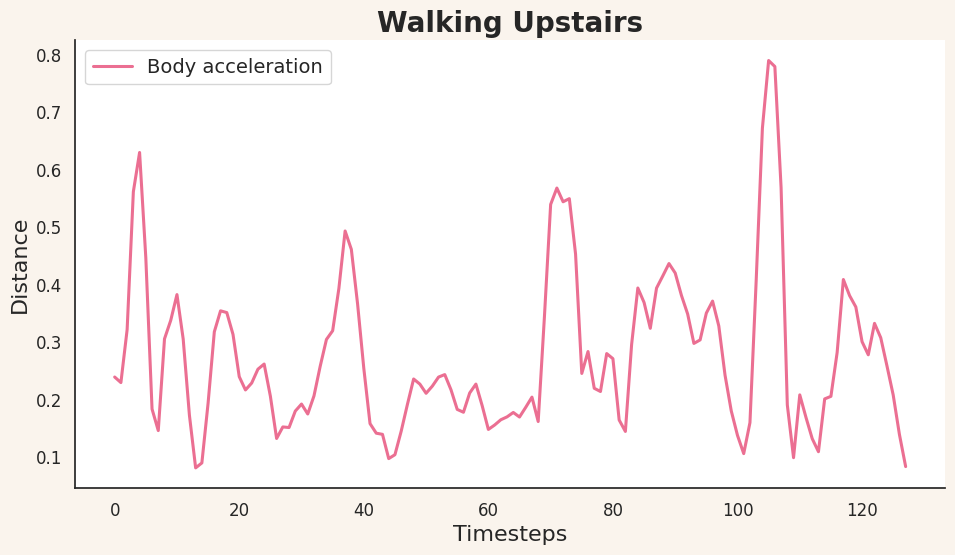

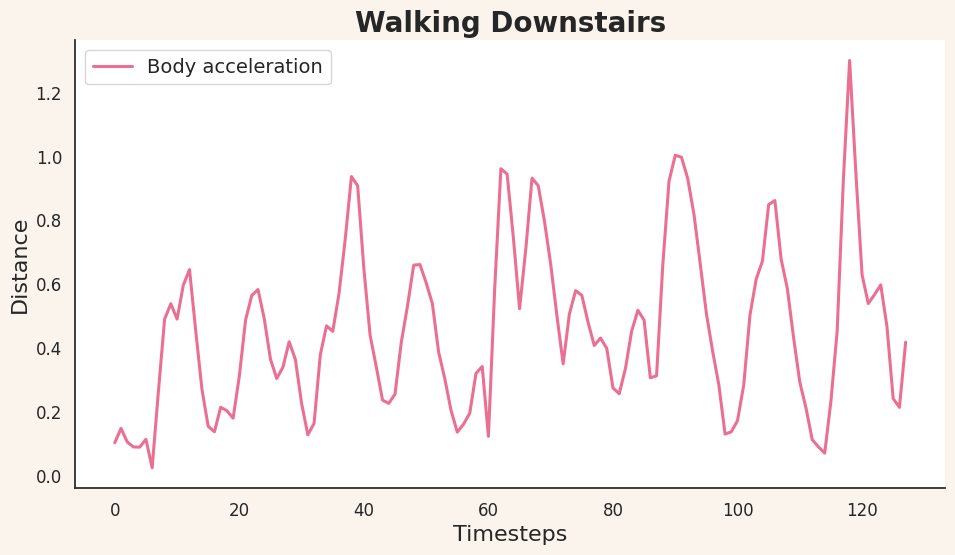

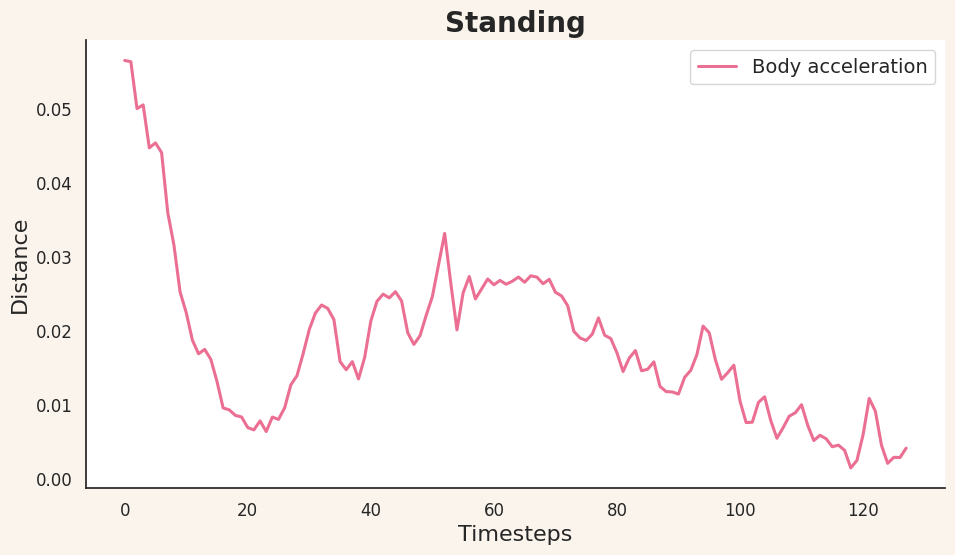

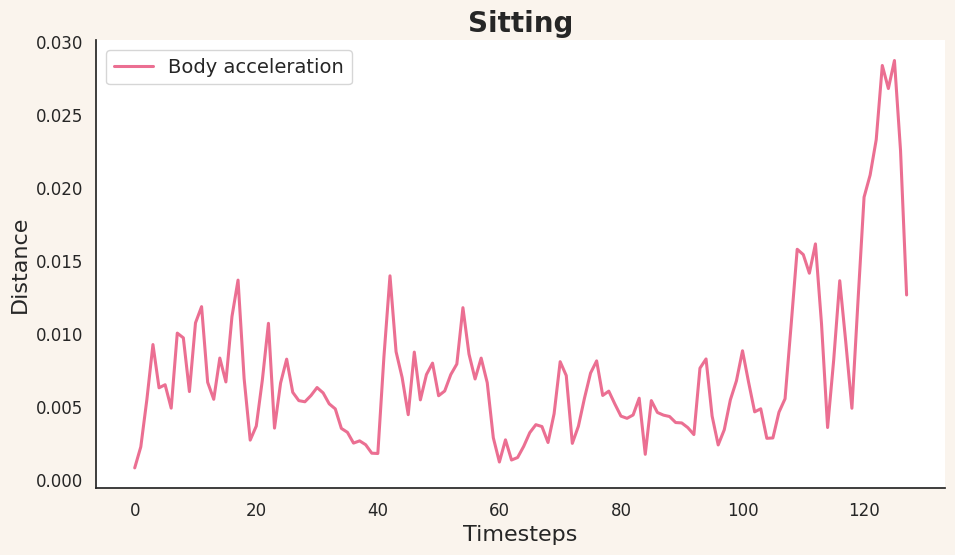

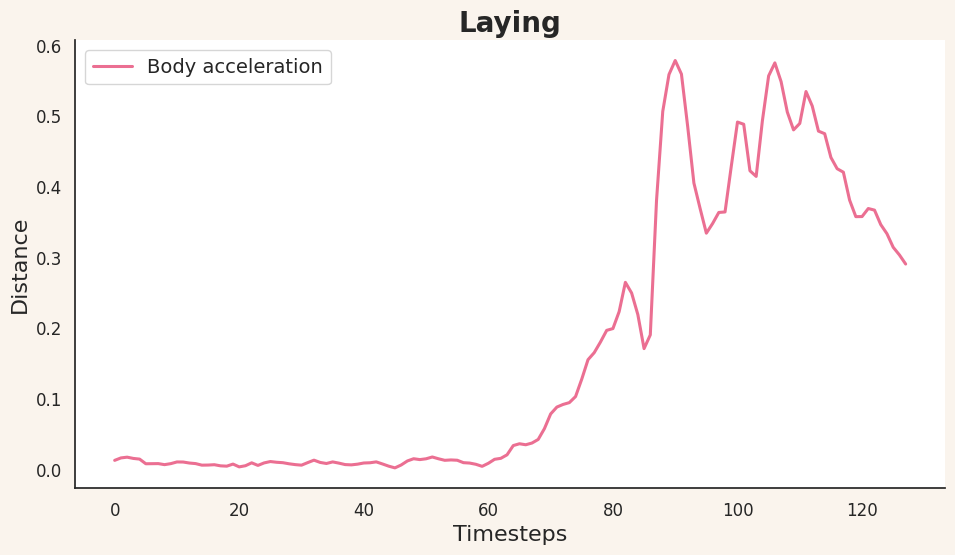

In [ ]:
for i in sample:
    distance_viz(i, "Body acceleration")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Apply Rose Pine Dawn style
sns.set_theme(style="whitegrid", font_scale=2.5)

def y_graph():
    # Combine labels and map to activity names
    y = pd.DataFrame(np.concatenate((y_train, y_test)), columns=["Activity"])
    y["Activity"] = y["Activity"].map(activity)

    # Create the figure
    fig, ax = plt.subplots(figsize=(36, 14))
    fig.patch.set_facecolor('#faf4ed')  # Rose Pine background

    # Plot with a soft color palette
    sns.countplot(data=y, y="Activity", ax=ax, palette=["#eb6f92", "#9ccfd8", "#f6c177", "#31748f", "#c4a7e7", "#ea9a97", "#f6c177"])

    # Titles and labels
    ax.set_title("Observations by Activity", fontsize=28, weight='bold')
    ax.set_xlabel("Count", fontsize=22)
    ax.set_ylabel("Activity", fontsize=22)

    # Customize tick sizes
    ax.tick_params(axis='x', labelsize=18)
    ax.tick_params(axis='y', labelsize=18)

    # Remove spines for minimal look
    sns.despine(left=True, bottom=True)

    # Tight layout
    plt.tight_layout()
    plt.show()


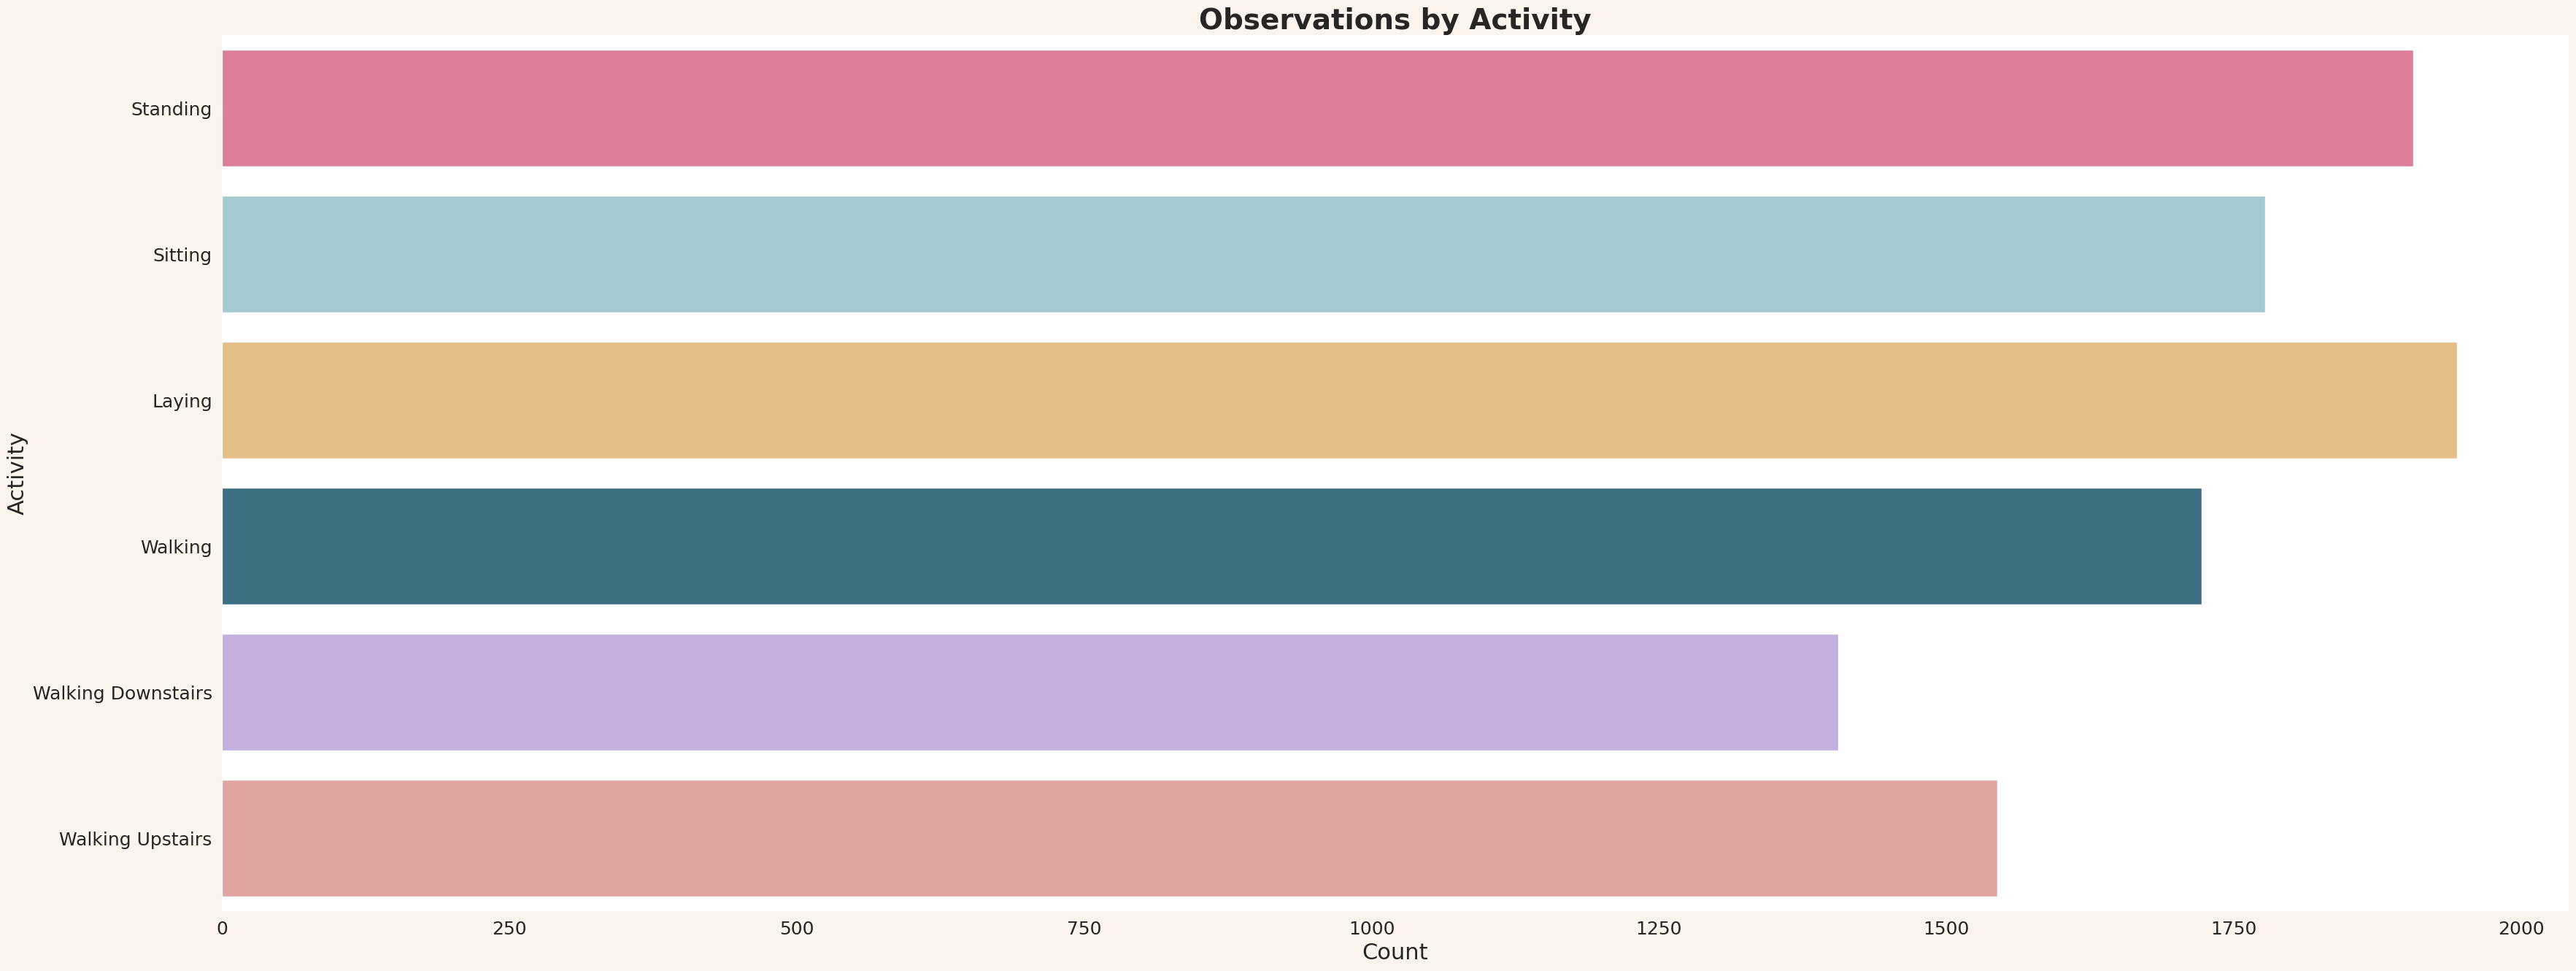

In [ ]:
y_graph()

# **4. Filter Based Approach (main) - Fischer's Score with Selective Feature Selection**

In [ ]:
df = pd.read_csv('train.csv')
df.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-kurtosis()  \
0         -0.923527         -0.934724  ...                        -0.710304   
1         -0.957686         -0.943068  ...                        -0.861499   
2         -0.977469         -0.938692  ...                        -0.760104   
3         -0.989302         -0.938692  ...                        -0.482845   
4         -0.990441         -0.942469  ...                        -0.699205   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                    -0.112754                              0.030400   
1                     0.053477                             -0.007435   
2                    -0.118559                              0.177899   
3                    -0.036788                             -0.012892   
4                     0.123320                              0.122542   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                         -0.464761                             -0.018446   
1                         -0.732626                              0.703511   
2                          0.100699                              0.808529   
3                          0.640011                             -0.485366   
4                          0.693578                             -0.615971   

   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  subject  \
0             -0.841247              0.179941             -0.058627        1   
1             -0.844788              0.180289             -0.054317        1   
2             -0.848933              0.180637             -0.049118        1   
3             -0.848649              0.181935             -0.047663        1   
4             -0.847865              0.185151             -0.043892        1   

   Activity  
0  STANDING  
1  STANDING  
2  STANDING  
3  STANDING  
4  STANDING  

[5 rows x 563 columns]

In [ ]:
df['Activity'].value_counts()

Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64

In [ ]:
df.shape

(7352, 563)

In [ ]:
df.describe().T

count       mean       std       min  \
tBodyAcc-mean()-X                     7352.0   0.274488  0.070261 -1.000000   
tBodyAcc-mean()-Y                     7352.0  -0.017695  0.040811 -1.000000   
tBodyAcc-mean()-Z                     7352.0  -0.109141  0.056635 -1.000000   
tBodyAcc-std()-X                      7352.0  -0.605438  0.448734 -1.000000   
tBodyAcc-std()-Y                      7352.0  -0.510938  0.502645 -0.999873   
...                                      ...        ...       ...       ...   
angle(tBodyGyroJerkMean,gravityMean)  7352.0  -0.005981  0.477975 -1.000000   
angle(X,gravityMean)                  7352.0  -0.489547  0.511807 -1.000000   
angle(Y,gravityMean)                  7352.0   0.058593  0.297480 -1.000000   
angle(Z,gravityMean)                  7352.0  -0.056515  0.279122 -1.000000   
subject                               7352.0  17.413085  8.975143  1.000000   

                                           25%        50%        75%  \
tBodyAcc-mean()-X                     0.262975   0.277193   0.288461   
tBodyAcc-mean()-Y                    -0.024863  -0.017219  -0.010783   
tBodyAcc-mean()-Z                    -0.120993  -0.108676  -0.097794   
tBodyAcc-std()-X                     -0.992754  -0.946196  -0.242813   
tBodyAcc-std()-Y                     -0.978129  -0.851897  -0.034231   
...                                        ...        ...        ...   
angle(tBodyGyroJerkMean,gravityMean) -0.376341  -0.000368   0.359368   
angle(X,gravityMean)                 -0.812065  -0.709417  -0.509079   
angle(Y,gravityMean)                 -0.017885   0.182071   0.248353   
angle(Z,gravityMean)                 -0.143414   0.003181   0.107659   
subject                               8.000000  19.000000  26.000000   

                                            max  
tBodyAcc-mean()-X                      1.000000  
tBodyAcc-mean()-Y                      1.000000  
tBodyAcc-mean()-Z                      1.000000  
tBodyAcc-std()-X                       1.000000  
tBodyAcc-std()-Y                       0.916238  
...                                         ...  
angle(tBodyGyroJerkMean,gravityMean)   0.996078  
angle(X,gravityMean)                   1.000000  
angle(Y,gravityMean)                   0.478157  
angle(Z,gravityMean)                   1.000000  
subject                               30.000000  

[562 rows x 8 columns]

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Separate features and target
X = df.drop('Activity', axis=1)
y = df['Activity']

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(5881, 562)
(1471, 562)


In [ ]:
#log-reg
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.982324949014276


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Calculate and print accuracy score for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Test accuracy:", accuracy_rf)


Random Forest Test accuracy: 0.981645139360979


In [ ]:
def get_duplicate_columns(df):

    duplicate_columns = {}
    seen_columns = {}

    for column in df.columns:
        current_column = df[column]

        # Convert column data to bytes
        try:
            current_column_hash = current_column.values.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_string().encode()

        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column

    return duplicate_columns

In [ ]:
duplicate_columns = get_duplicate_columns(X_train)

In [ ]:
duplicate_columns

{'tBodyAccMag-mean()': ['tBodyAccMag-sma()',
  'tGravityAccMag-mean()',
  'tGravityAccMag-sma()'],
 'tBodyAccMag-std()': ['tGravityAccMag-std()'],
 'tBodyAccMag-mad()': ['tGravityAccMag-mad()'],
 'tBodyAccMag-max()': ['tGravityAccMag-max()'],
 'tBodyAccMag-min()': ['tGravityAccMag-min()'],
 'tBodyAccMag-energy()': ['tGravityAccMag-energy()'],
 'tBodyAccMag-iqr()': ['tGravityAccMag-iqr()'],
 'tBodyAccMag-entropy()': ['tGravityAccMag-entropy()'],
 'tBodyAccMag-arCoeff()1': ['tGravityAccMag-arCoeff()1'],
 'tBodyAccMag-arCoeff()2': ['tGravityAccMag-arCoeff()2'],
 'tBodyAccMag-arCoeff()3': ['tGravityAccMag-arCoeff()3'],
 'tBodyAccMag-arCoeff()4': ['tGravityAccMag-arCoeff()4'],
 'tBodyAccJerkMag-mean()': ['tBodyAccJerkMag-sma()'],
 'tBodyGyroMag-mean()': ['tBodyGyroMag-sma()'],
 'tBodyGyroJerkMag-mean()': ['tBodyGyroJerkMag-sma()'],
 'fBodyAccMag-mean()': ['fBodyAccMag-sma()'],
 'fBodyBodyAccJerkMag-mean()': ['fBodyBodyAccJerkMag-sma()'],
 'fBodyBodyGyroMag-mean()': ['fBodyBodyGyroMag-sma()'

In [ ]:
X_train[['tBodyAccMag-mean()','tBodyAccMag-sma()','tGravityAccMag-mean()','tGravityAccMag-sma()']]

tBodyAccMag-mean()  tBodyAccMag-sma()  tGravityAccMag-mean()  \
57             -0.997420          -0.997420              -0.997420   
4154           -0.133797          -0.133797              -0.133797   
6945            0.130528           0.130528               0.130528   
527            -0.955222          -0.955222              -0.955222   
4196           -0.992499          -0.992499              -0.992499   
...                  ...                ...                    ...   
5191           -0.372758          -0.372758              -0.372758   
5226           -0.256033          -0.256033              -0.256033   
5390           -0.434138          -0.434138              -0.434138   
860            -0.983969          -0.983969              -0.983969   
7270           -0.200163          -0.200163              -0.200163   

      tGravityAccMag-sma()  
57               -0.997420  
4154             -0.133797  
6945              0.130528  
527              -0.955222  
4196             -0.992499  
...                    ...  
5191             -0.372758  
5226             -0.256033  
5390             -0.434138  
860              -0.983969  
7270             -0.200163  

[5881 rows x 4 columns]

In [ ]:
for one_list in duplicate_columns.values():
    X_train.drop(columns=one_list,inplace=True)
    X_test.drop(columns=one_list,inplace=True)

In [ ]:


print(X_train.shape)
print(X_test.shape)



(5881, 541)
(1471, 541)


In [ ]:


from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.05)



In [ ]:
sel.fit(X_train)

VarianceThreshold(threshold=0.05)

In [ ]:
sum(sel.get_support())

np.int64(350)

In [ ]:
columns = X_train.columns[sel.get_support()]

In [ ]:
columns

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject'],
      dtype='object', length=350)

In [ ]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [ ]:


print(X_train.shape)
print(X_test.shape)



(5881, 350)
(1471, 350)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use Rose Pine Dawn style
sns.set_theme(style="white", font_scale=0.5)  # Smaller font for high-dimension data

def big_corr_heatmap():
    corr_matrix = X_train.corr()

    # Set up a big figure so the plot can be zoomed
    fig, ax = plt.subplots(figsize=(50, 40))  # Adjust size if needed
    fig.patch.set_facecolor('#faf4ed')

    # Draw the heatmap
    sns.heatmap(corr_matrix,
                cmap="mako",  # a soft seaborn-compatible colormap
                linewidths=0.05,
                linecolor='#e0def4',
                square=True,
                cbar_kws={'shrink': 0.4},
                xticklabels=False,
                yticklabels=False,
                ax=ax)

    # Optional: Title
    ax.set_title("Correlation Heatmap of Features", fontsize=20, weight='bold', pad=20)

    # Tighter layout for clarity
    plt.tight_layout()
    plt.show()


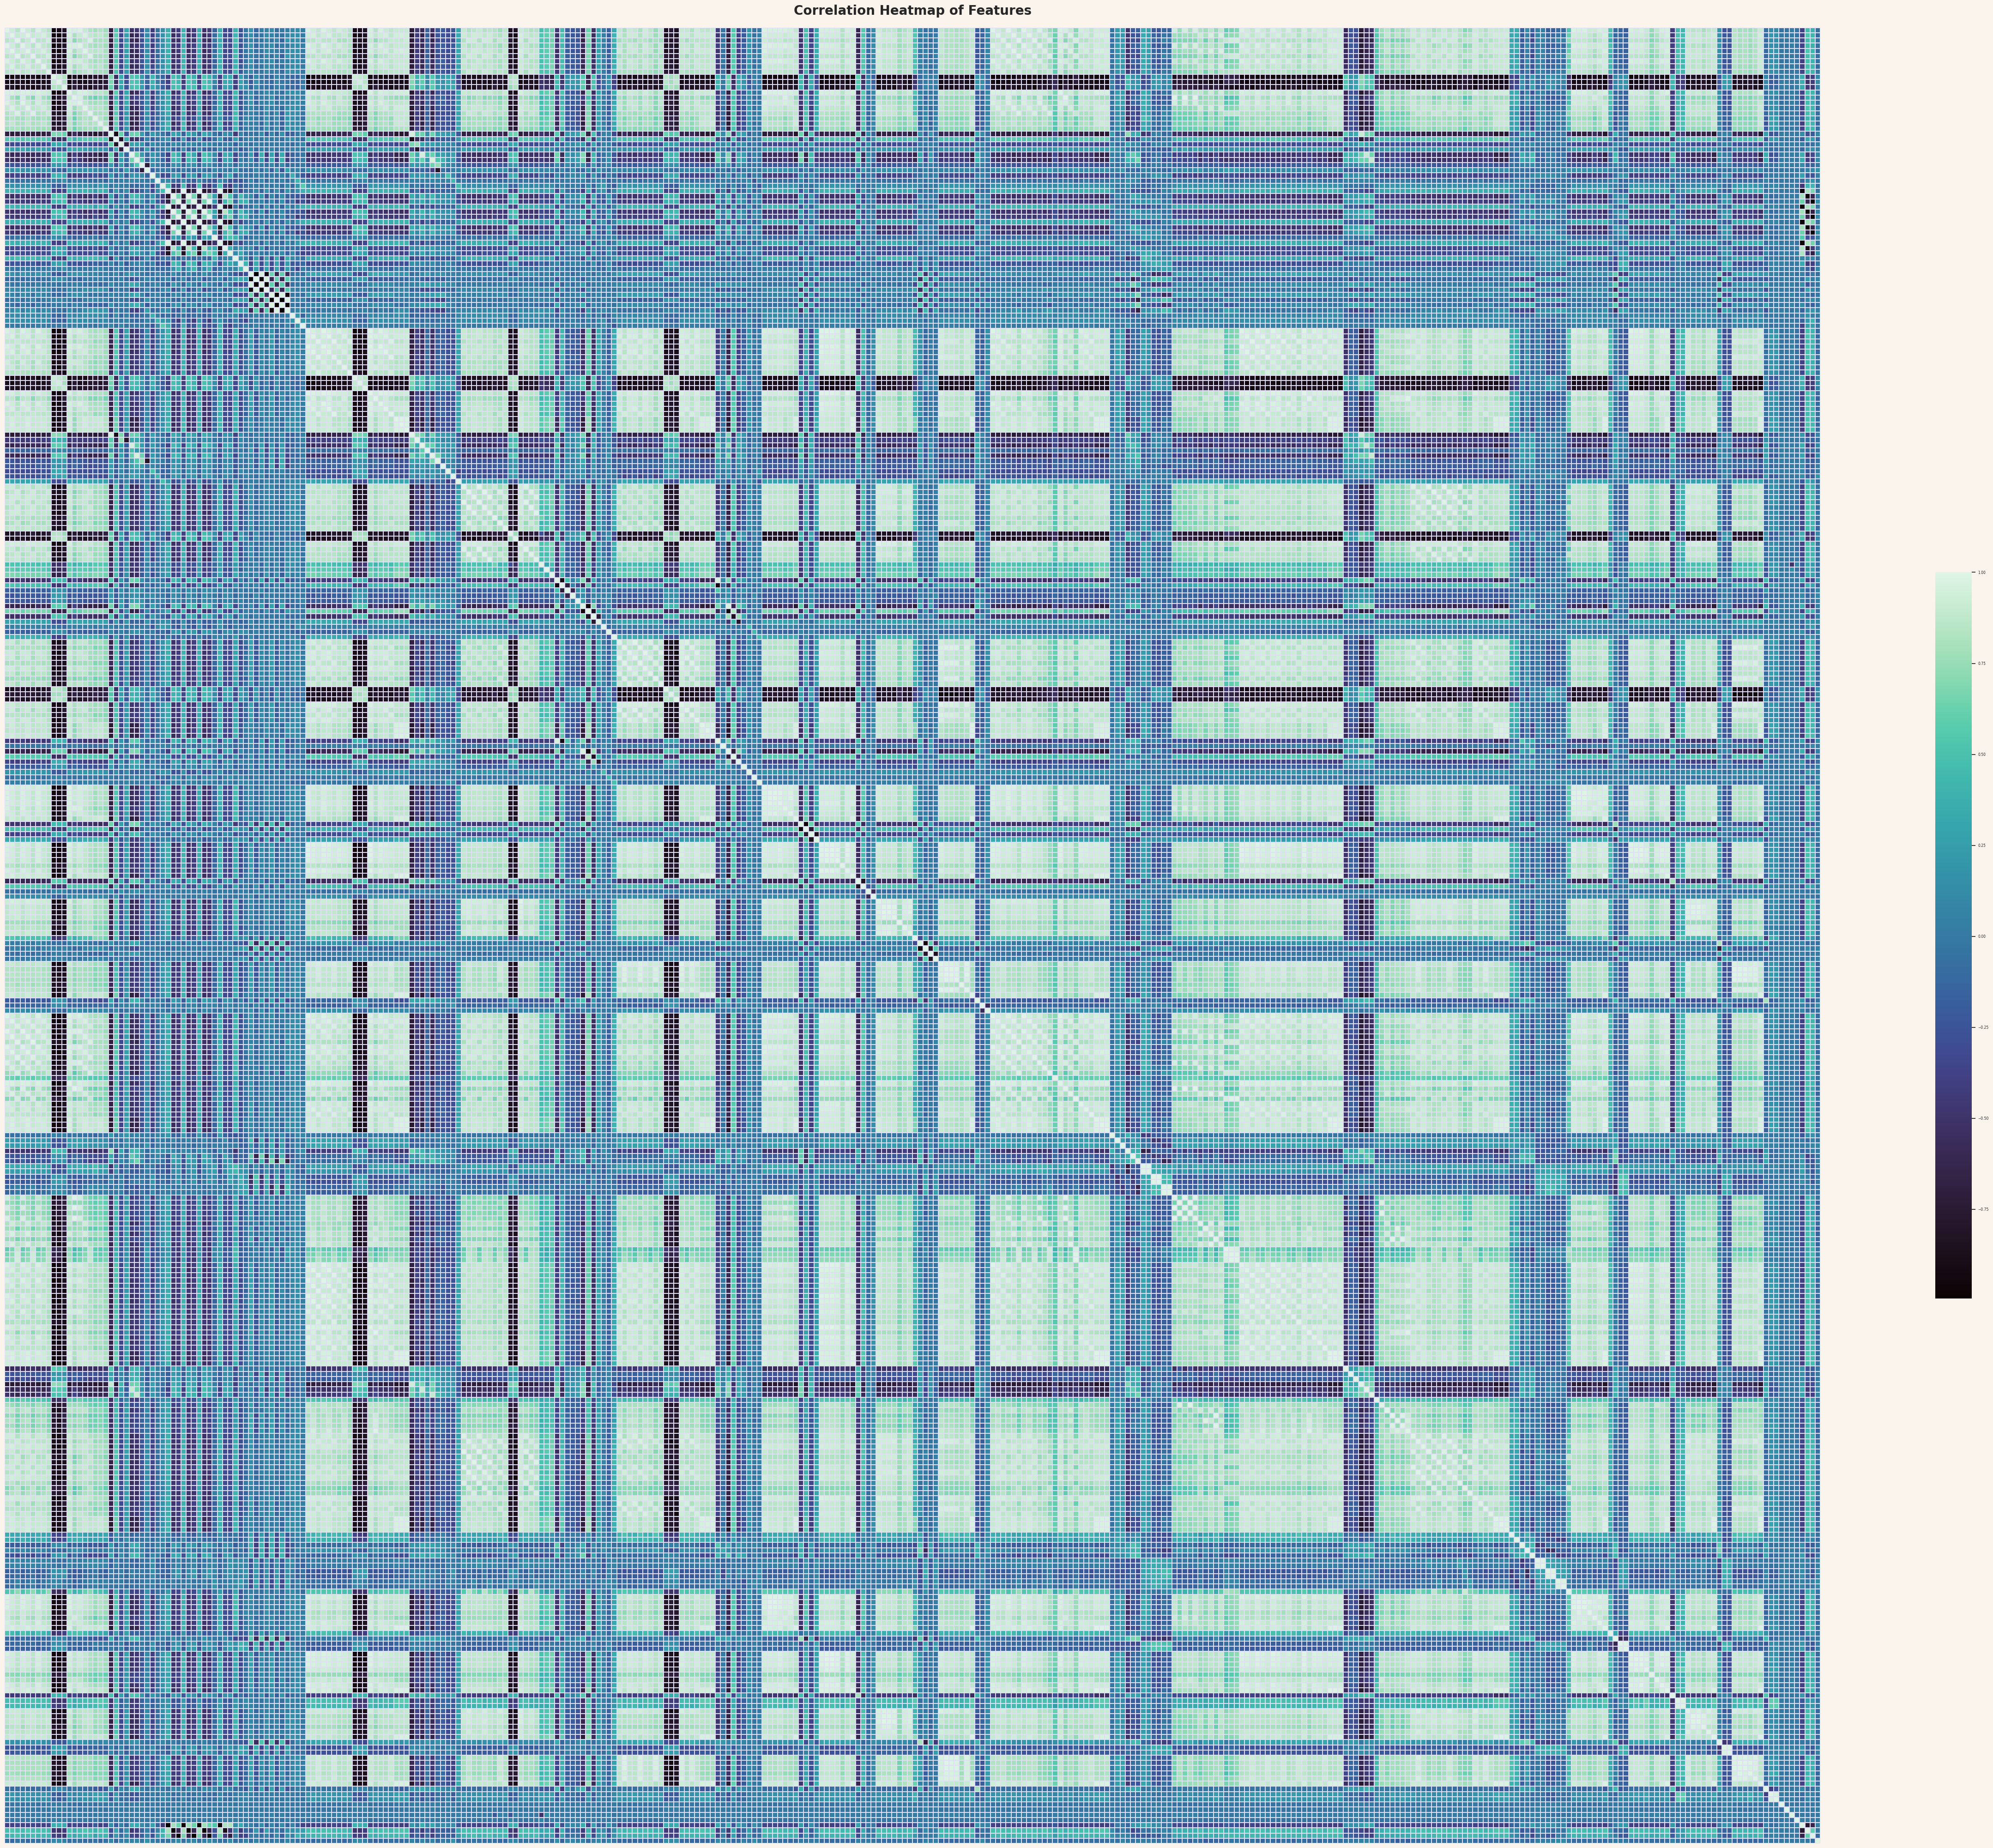

In [ ]:
def big_corr_heatmap():
    corr_matrix = X_train.corr()

    fig, ax = plt.subplots(figsize=(50, 40))
    fig.patch.set_facecolor('#faf4ed')

    sns.heatmap(
        corr_matrix,
        cmap="mako",
        linewidths=0.05,
        linecolor='#e0def4',
        square=True,
        cbar_kws={'shrink': 0.4},
        xticklabels=False,
        yticklabels=False,
        ax=ax
    )

    ax.set_title("Correlation Heatmap of Features", fontsize=20, weight='bold', pad=20)

    plt.tight_layout()
    plt.show()

# Show it
big_corr_heatmap()


In [ ]:
corr_matrix = X_train.corr()

In [ ]:
columns = corr_matrix.columns

columns_to_drop = []

for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        if corr_matrix.loc[columns[i], columns[j]] > 0.95:
            columns_to_drop.append(columns[j])

print(len(columns_to_drop))

1508


In [ ]:
columns_to_drop=set(columns_to_drop)
len(columns_to_drop)

197

In [ ]:
X_train.shape

(5881, 350)

In [ ]:


X_train.drop(columns = columns_to_drop, axis = 1, inplace=True)
X_test.drop(columns = columns_to_drop, axis = 1, inplace=True)



In [ ]:


print(X_train.shape)
print(X_test.shape)



(5881, 153)
(1471, 153)


In [ ]:
#ANOVA

In [ ]:


from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest


sel = SelectKBest(f_classif, k=153).fit(X_train, y_train)

X_train.columns[sel.get_support()]



Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y',
       'tBodyAcc-min()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y',
       'tBodyAcc-entropy()-Z',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject'],
      dtype='object', length=153)

In [ ]:
columns = X_train.columns[sel.get_support()]

In [ ]:


X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)



In [ ]:


print(X_train.shape)
print(X_test.shape)



(5881, 153)
(1471, 153)


In [ ]:
X_train.head()

tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-max()-Z  \
0         -0.994425         -0.994873         -0.994886         -0.813863   
1         -0.326331          0.069663         -0.224321         -0.411806   
2         -0.026220         -0.032163          0.393109          0.200747   
3         -0.981092         -0.901124         -0.960423         -0.807362   
4         -0.997380         -0.983893         -0.984482         -0.810993   

   tBodyAcc-min()-X  tBodyAcc-min()-Y  tBodyAcc-min()-Z  tBodyAcc-entropy()-X  \
0          0.846922          0.691468          0.846423             -0.611174   
1          0.271334          0.039452          0.269204              0.403663   
2          0.118277          0.072295          0.245986              0.318557   
3          0.825370          0.642789          0.815368             -0.376515   
4          0.853330          0.687431          0.844895             -0.652548   

   tBodyAcc-entropy()-Y  tBodyAcc-entropy()-Z  ...  \
0             -0.768785             -0.663066  ...   
1              0.180054              0.176069  ...   
2              0.135103              0.087680  ...   
3             -0.171730             -0.496816  ...   
4             -0.678458             -0.486837  ...   

   fBodyBodyGyroJerkMag-meanFreq()  fBodyBodyGyroJerkMag-skewness()  \
0                         0.394506                        -0.684497   
1                         0.052089                        -0.131946   
2                        -0.038923                        -0.643660   
3                        -0.145084                        -0.326860   
4                         0.096524                        -0.113724   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                     0.751089                              0.626432   
1                     0.628099                             -0.357089   
2                    -0.182993                              0.484857   
3                     0.205896                             -0.168239   
4                    -0.267371                             -0.304399   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                          0.263401                             -0.646225   
1                         -0.925512                              0.110212   
2                         -0.961034                              0.147325   
3                         -0.197557                              0.328892   
4                         -0.081555                              0.110146   

   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  subject  
0              0.398881             -0.546717             -0.431200      1.0  
1             -0.474013              0.383162              0.238969     21.0  
2             -0.819001              0.221549             -0.003571     29.0  
3             -0.744428              0.274256              0.031246      3.0  
4             -0.615329              0.322236              0.161577     21.0  

[5 rows x 153 columns]

In [ ]:
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if it doesn't converge
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.9721278042148198


In [ ]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy (SVM):", accuracy)


Test accuracy (SVM): 0.9748470428280082


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy (Random Forest):", accuracy)


Test accuracy (Random Forest): 0.9836845683208701


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy (Decision Tree):", accuracy)


Test accuracy (Decision Tree): 0.9483344663494222


In [ ]:
pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 109.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 692.3/692.3 kB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.5 MB/s eta 0:00:00


In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier()
models = clf.fit(X_train, X_test, y_train, y_test)

print(models[0])

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010688 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36772
[LightGBM] [Info] Number of data points in the train set: 5881, number of used features: 153
[LightGBM] [Info] Start training from score -1.652168
[LightGBM] [Info] Start training from score -1.748010
[LightGBM] [Info] Start training from score -1.678236
[LightGBM] [Info] Start training from score -1.792950
[LightGBM] [Info] Start training from score -2.020188
[LightGBM] [Info] Start training from score -1.907547
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

# **5. Other Filter Based Methods (not recommended)**

In [ ]:
df

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0                  0.29              -0.02              -0.13   
1                  0.28              -0.02              -0.12   
2                  0.28              -0.02              -0.11   
3                  0.28              -0.03              -0.12   
4                  0.28              -0.02              -0.12   
...                 ...                ...                ...   
7347               0.30              -0.06              -0.18   
7348               0.27              -0.01              -0.15   
7349               0.27              -0.02              -0.05   
7350               0.29              -0.02              -0.16   
7351               0.35              -0.01              -0.20   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0                -1.00             -0.98             -0.91             -1.00   
1                -1.00             -0.98             -0.96             -1.00   
2                -1.00             -0.97             -0.98             -1.00   
3                -1.00             -0.98             -0.99             -1.00   
4                -1.00             -0.98             -0.99             -1.00   
...                ...               ...               ...               ...   
7347             -0.20              0.04              0.08             -0.28   
7348             -0.24              0.00              0.06             -0.32   
7349             -0.22             -0.10              0.27             -0.30   
7350             -0.22             -0.11              0.27             -0.31   
7351             -0.27             -0.09              0.18             -0.38   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
0                -0.98             -0.92             -0.93  ...   
1                -0.97             -0.96             -0.94  ...   
2                -0.96             -0.98             -0.94  ...   
3                -0.98             -0.99             -0.94  ...   
4                -0.98             -0.99             -0.94  ...   
...                ...               ...               ...  ...   
7347              0.04              0.06              0.21  ...   
7348             -0.03              0.08              0.12  ...   
7349             -0.10              0.33              0.04  ...   
7350             -0.07              0.32              0.10  ...   
7351             -0.04              0.23              0.27  ...   

      fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
0                               -0.71                        -0.11   
1                               -0.86                         0.05   
2                               -0.76                        -0.12   
3                               -0.48                        -0.04   
4                               -0.70                         0.12   
...                               ...                          ...   
7347                            -0.88                        -0.19   
7348                            -0.68                         0.06   
7349                            -0.30                         0.05   
7350                            -0.34                        -0.10   
7351                            -0.74                        -0.28   

      angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                                     0.03                             -0.46   
1                                    -0.01                             -0.73   
2                                     0.18                              0.10   
3                                    -0.01                              0.64   
4                                     0.12                              0.69   
...                                    ...                               ...   
7347                                  0.83                

In [ ]:
df

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0                  0.29              -0.02              -0.13   
1                  0.28              -0.02              -0.12   
2                  0.28              -0.02              -0.11   
3                  0.28              -0.03              -0.12   
4                  0.28              -0.02              -0.12   
...                 ...                ...                ...   
7347               0.30              -0.06              -0.18   
7348               0.27              -0.01              -0.15   
7349               0.27              -0.02              -0.05   
7350               0.29              -0.02              -0.16   
7351               0.35              -0.01              -0.20   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0                -1.00             -0.98             -0.91             -1.00   
1                -1.00             -0.98             -0.96             -1.00   
2                -1.00             -0.97             -0.98             -1.00   
3                -1.00             -0.98             -0.99             -1.00   
4                -1.00             -0.98             -0.99             -1.00   
...                ...               ...               ...               ...   
7347             -0.20              0.04              0.08             -0.28   
7348             -0.24              0.00              0.06             -0.32   
7349             -0.22             -0.10              0.27             -0.30   
7350             -0.22             -0.11              0.27             -0.31   
7351             -0.27             -0.09              0.18             -0.38   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
0                -0.98             -0.92             -0.93  ...   
1                -0.97             -0.96             -0.94  ...   
2                -0.96             -0.98             -0.94  ...   
3                -0.98             -0.99             -0.94  ...   
4                -0.98             -0.99             -0.94  ...   
...                ...               ...               ...  ...   
7347              0.04              0.06              0.21  ...   
7348             -0.03              0.08              0.12  ...   
7349             -0.10              0.33              0.04  ...   
7350             -0.07              0.32              0.10  ...   
7351             -0.04              0.23              0.27  ...   

      fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
0                               -0.71                        -0.11   
1                               -0.86                         0.05   
2                               -0.76                        -0.12   
3                               -0.48                        -0.04   
4                               -0.70                         0.12   
...                               ...                          ...   
7347                            -0.88                        -0.19   
7348                            -0.68                         0.06   
7349                            -0.30                         0.05   
7350                            -0.34                        -0.10   
7351                            -0.74                        -0.28   

      angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                                     0.03                             -0.46   
1                                    -0.01                             -0.73   
2                                     0.18                              0.10   
3                                    -0.01                              0.64   
4                                     0.12                              0.69   
...                                    ...                               ...   
7347                                  0.83                

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Separate features and target
X = df.drop('Activity', axis=1)
y = df['Activity']

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def get_duplicate_columns(df):

    duplicate_columns = {}
    seen_columns = {}

    for column in df.columns:
        current_column = df[column]

        # Convert column data to bytes
        try:
            current_column_hash = current_column.values.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_string().encode()

        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column

    return duplicate_columns

In [ ]:
duplicate_columns = get_duplicate_columns(X_train)

In [ ]:
duplicate_columns

{'tBodyAccMag-mean()': ['tBodyAccMag-sma()',
  'tGravityAccMag-mean()',
  'tGravityAccMag-sma()'],
 'tBodyAccMag-std()': ['tGravityAccMag-std()'],
 'tBodyAccMag-mad()': ['tGravityAccMag-mad()'],
 'tBodyAccMag-max()': ['tGravityAccMag-max()'],
 'tBodyAccMag-min()': ['tGravityAccMag-min()'],
 'tBodyAccMag-energy()': ['tGravityAccMag-energy()'],
 'tBodyAccMag-iqr()': ['tGravityAccMag-iqr()'],
 'tBodyAccMag-entropy()': ['tGravityAccMag-entropy()'],
 'tBodyAccMag-arCoeff()1': ['tGravityAccMag-arCoeff()1'],
 'tBodyAccMag-arCoeff()2': ['tGravityAccMag-arCoeff()2'],
 'tBodyAccMag-arCoeff()3': ['tGravityAccMag-arCoeff()3'],
 'tBodyAccMag-arCoeff()4': ['tGravityAccMag-arCoeff()4'],
 'tBodyAccJerkMag-mean()': ['tBodyAccJerkMag-sma()'],
 'tBodyGyroMag-mean()': ['tBodyGyroMag-sma()'],
 'tBodyGyroJerkMag-mean()': ['tBodyGyroJerkMag-sma()'],
 'fBodyAccMag-mean()': ['fBodyAccMag-sma()'],
 'fBodyBodyAccJerkMag-mean()': ['fBodyBodyAccJerkMag-sma()'],
 'fBodyBodyGyroMag-mean()': ['fBodyBodyGyroMag-sma()'

In [ ]:
X_train[['tBodyAccMag-mean()','tBodyAccMag-sma()','tGravityAccMag-mean()','tGravityAccMag-sma()']]

tBodyAccMag-mean()  tBodyAccMag-sma()  tGravityAccMag-mean()  \
57                 -1.00              -1.00                  -1.00   
4154               -0.13              -0.13                  -0.13   
6945                0.13               0.13                   0.13   
527                -0.96              -0.96                  -0.96   
4196               -0.99              -0.99                  -0.99   
...                  ...                ...                    ...   
5191               -0.37              -0.37                  -0.37   
5226               -0.26              -0.26                  -0.26   
5390               -0.43              -0.43                  -0.43   
860                -0.98              -0.98                  -0.98   
7270               -0.20              -0.20                  -0.20   

      tGravityAccMag-sma()  
57                   -1.00  
4154                 -0.13  
6945                  0.13  
527                  -0.96  
4196                 -0.99  
...                    ...  
5191                 -0.37  
5226                 -0.26  
5390                 -0.43  
860                  -0.98  
7270                 -0.20  

[5881 rows x 4 columns]

In [ ]:
for one_list in duplicate_columns.values():
    X_train.drop(columns=one_list,inplace=True)
    X_test.drop(columns=one_list,inplace=True)

In [ ]:


print(X_train.shape)
print(X_test.shape)



(5881, 541)
(1471, 541)


In [ ]:
#CHI2

In [ ]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func=chi2)),
    ('clf', RandomForestClassifier(random_state=42))
])


In [ ]:
param_grid = {
    'feature_selection__k': [10, 20, 30, 50, 75, 100, 110, 120]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('feature_selection',
                                        SelectKBest(score_func=<function chi2 at 0x7dada4b999e0>)),
                                       ('clf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'feature_selection__k': [10, 20, 30, 50, 75, 100, 110,
                                                  120]},
             scoring='accuracy')

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with top chi2-selected features: {accuracy:.4f}")

Accuracy with top chi2-selected features: 0.9483


In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier()
models = clf.fit(X_train, X_test, y_train, y_test)

print(models[0])

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.038611 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 134827
[LightGBM] [Info] Number of data points in the train set: 5881, number of used features: 541
[LightGBM] [Info] Start training from score -1.652168
[LightGBM] [Info] Start training from score -1.748010
[LightGBM] [Info] Start training from score -1.678236
[LightGBM] [Info] Start training from score -1.792950
[LightGBM] [Info] Start training from score -2.020188
[LightGBM] [Info] Start training from score -1.907547
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

In [ ]:
#Mutual Info

In [ ]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func=mutual_info_classif)),
    ('clf', RandomForestClassifier(random_state=42))
])

In [ ]:
param_grid = {
    'feature_selection__k': [10, 20, 30, 50, 75, 'all']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('feature_selection',
                                        SelectKBest(score_func=<function mutual_info_classif at 0x7dada4b9b920>)),
                                       ('clf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'feature_selection__k': [10, 20, 30, 50, 75, 'all']},
             scoring='accuracy')

In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print("Best k value (Mutual Info):", grid_search.best_params_['feature_selection__k'])
print(f"Accuracy with best k (MI): {accuracy:.4f}")


Best k value (Mutual Info): all
Accuracy with best k (MI): 0.9844


In [ ]:
mi_scores = mutual_info_classif(X_train_scaled, y_train)
sorted_indices = np.argsort(mi_scores)[::-1]
print("Top 10 MI feature indices:", sorted_indices[:10])
print("Top 10 MI scores:", mi_scores[sorted_indices[:10]])


Top 10 MI feature indices: [  9  53  89  50 293 251 203 285 264   3]
Top 10 MI scores: [0.96572853 0.93136677 0.90842652 0.90798929 0.89286738 0.88627177
 0.88600532 0.88364333 0.87646509 0.87587674]


# **6.Iterative feature selection - CHI SQUARE**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm

In [ ]:
num_features = X_train_scaled.shape[1]

k_values = []
accuracies = []

In [ ]:
for k in tqdm(range(1, num_features + 1)):
    selector = SelectKBest(score_func=chi2, k=k)
    X_train_k = selector.fit_transform(X_train_scaled, y_train)
    X_test_k = selector.transform(X_test_scaled)

    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train_k, y_train)
    y_pred = clf.predict(X_test_k)
    acc = accuracy_score(y_test, y_pred)

    k_values.append(k)
    accuracies.append(acc)

100%|██████████| 541/541 [1:12:11<00:00,  8.01s/it]


In [ ]:
# prompt: k_values = np.array(k_values)
# accuracies = np.array(accuracies)
# display them and save them as a csv

import numpy as np
import pandas as pd

k_values = np.array(k_values)
accuracies = np.array(accuracies)

# Display k_values and accuracies
print("k_values:", k_values)
print("accuracies:", accuracies)

# Create a DataFrame
df_results = pd.DataFrame({'k_values': k_values, 'accuracies': accuracies})

# Save to CSV
df_results.to_csv('k_accuracy_results.csv', index=False)


k_values: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 

In [ ]:
import matplotlib.pyplot as plt


def plot_elbow_curve(k_values, accuracies):
    plt.figure(figsize=(12, 6))
    plt.plot(
        k_values,
        accuracies,
        marker='o',
        linestyle='-',
        color='#eb6f92',
        linewidth=2.5,
        markersize=8,
        markerfacecolor='#f6c177',
        markeredgecolor='#31748f'
    )

    plt.title('Elbow Curve: Accuracy vs. Number of Features (Chi²)', fontsize=18, weight='bold')
    plt.xlabel('Number of Selected Features (k)', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)

    plt.grid(True, color='#c4a7e7', linestyle='--', linewidth=0.5)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.tight_layout()
    plt.show()


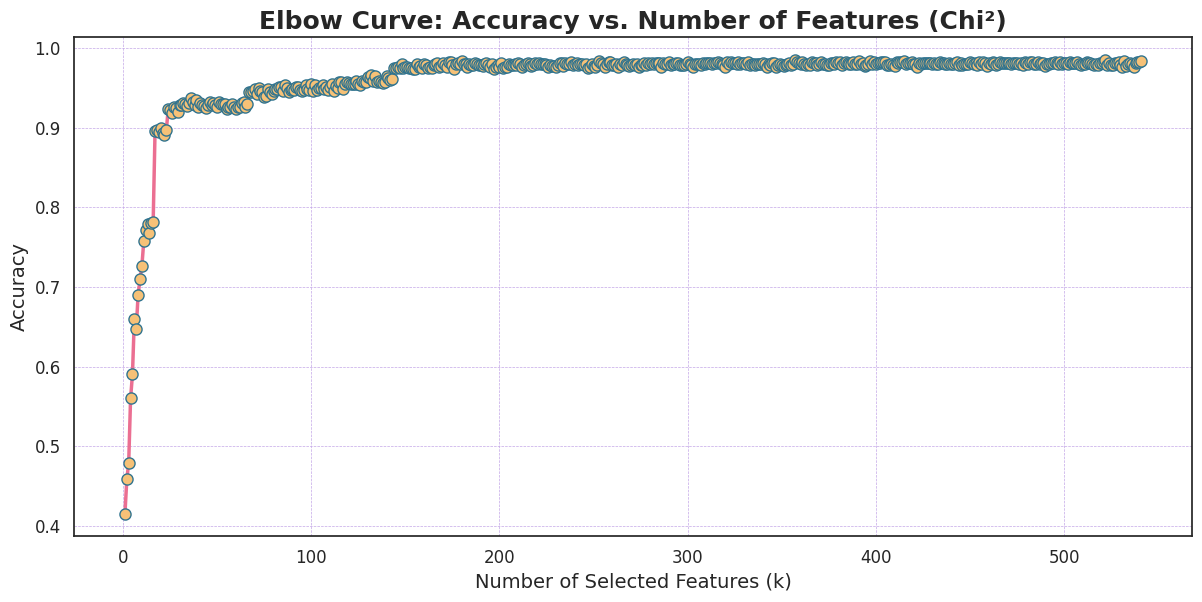

In [ ]:
plot_elbow_curve(k_values, accuracies)

In [ ]:
# Get top 30 k-values
acc_array = np.array(accuracies)
k_array = np.array(k_values)
top_indices = acc_array.argsort()[::-1][:30]

top_k_acc = [(k_array[i], acc_array[i]) for i in top_indices]
print("Top 10 k-values with corresponding accuracies (Chi²):")
for k, acc in top_k_acc:
    print(f"k = {k}, Accuracy = {acc:.4f}")


Top 10 k-values with corresponding accuracies (Chi²):
k = 522, Accuracy = 0.9850
k = 357, Accuracy = 0.9850
k = 415, Accuracy = 0.9844
k = 397, Accuracy = 0.9844
k = 541, Accuracy = 0.9844
k = 180, Accuracy = 0.9837
k = 391, Accuracy = 0.9837
k = 532, Accuracy = 0.9837
k = 253, Accuracy = 0.9837
k = 457, Accuracy = 0.9830
k = 455, Accuracy = 0.9830
k = 466, Accuracy = 0.9830
k = 381, Accuracy = 0.9830
k = 486, Accuracy = 0.9830
k = 404, Accuracy = 0.9830
k = 414, Accuracy = 0.9830
k = 259, Accuracy = 0.9830
k = 539, Accuracy = 0.9830
k = 512, Accuracy = 0.9830
k = 321, Accuracy = 0.9830
k = 507, Accuracy = 0.9830
k = 529, Accuracy = 0.9830
k = 495, Accuracy = 0.9830
k = 479, Accuracy = 0.9830
k = 403, Accuracy = 0.9823
k = 450, Accuracy = 0.9823
k = 462, Accuracy = 0.9823
k = 413, Accuracy = 0.9823
k = 238, Accuracy = 0.9823
k = 332, Accuracy = 0.9823


So, the best accuracy we are getting is a t k = 180

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# Fit Chi2 selector
selector_180 = SelectKBest(score_func=chi2, k=180)
X_train_180 = selector_180.fit_transform(X_train_scaled, y_train)
X_test_180 = selector_180.transform(X_test_scaled)

# Get selected feature indices
selected_indices_180 = selector_180.get_support(indices=True)
print("Selected feature indices (k=180):", selected_indices_180)


Selected feature indices (k=180): [  3   4   5   6   7   8   9  15  16  19  20  21  41  50  56  57  58  83
  84  85  86  87  88  89  90  91  95  96  97  99 100 101 102 103 104 123
 124 125 126 127 128 135 139 140 141 163 164 165 166 167 168 169 171 175
 179 181 182 183 184 200 201 202 203 205 206 207 212 213 214 215 216 218
 219 224 225 226 227 230 236 237 238 239 243 248 249 250 251 252 253 254
 255 256 257 258 259 263 264 265 267 268 269 270 271 272 285 293 297 299
 307 311 327 328 329 330 331 332 333 334 335 336 337 342 343 344 346 347
 348 349 350 351 364 374 376 378 380 387 390 406 407 408 409 410 411 412
 413 414 415 416 417 421 425 426 427 428 429 430 485 486 487 490 491 492
 497 498 499 500 502 503 504 509 510 511 512 515 516 521 523 527 528 537]


In [ ]:

if isinstance(X_train, pd.DataFrame):
    selected_features_180 = X_train.columns[selected_indices_180]
    print("Selected feature names (k=180):")
    for i, name in enumerate(selected_features_180, 1):
        print(f"{i:3}: {name}")


Selected feature names (k=180):
  1: tBodyAcc-std()-X
  2: tBodyAcc-std()-Y
  3: tBodyAcc-std()-Z
  4: tBodyAcc-mad()-X
  5: tBodyAcc-mad()-Y
  6: tBodyAcc-mad()-Z
  7: tBodyAcc-max()-X
  8: tBodyAcc-sma()
  9: tBodyAcc-energy()-X
 10: tBodyAcc-iqr()-X
 11: tBodyAcc-iqr()-Y
 12: tBodyAcc-iqr()-Z
 13: tGravityAcc-mean()-Y
 14: tGravityAcc-max()-Y
 15: tGravityAcc-energy()-X
 16: tGravityAcc-energy()-Y
 17: tGravityAcc-energy()-Z
 18: tBodyAccJerk-std()-X
 19: tBodyAccJerk-std()-Y
 20: tBodyAccJerk-std()-Z
 21: tBodyAccJerk-mad()-X
 22: tBodyAccJerk-mad()-Y
 23: tBodyAccJerk-mad()-Z
 24: tBodyAccJerk-max()-X
 25: tBodyAccJerk-max()-Y
 26: tBodyAccJerk-max()-Z
 27: tBodyAccJerk-sma()
 28: tBodyAccJerk-energy()-X
 29: tBodyAccJerk-energy()-Y
 30: tBodyAccJerk-iqr()-X
 31: tBodyAccJerk-iqr()-Y
 32: tBodyAccJerk-iqr()-Z
 33: tBodyAccJerk-entropy()-X
 34: tBodyAccJerk-entropy()-Y
 35: tBodyAccJerk-entropy()-Z
 36: tBodyGyro-std()-X
 37: tBodyGyro-std()-Y
 38: tBodyGyro-std()-Z
 39: tBodyGyro-

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Step 1: Select top 180 features
selector_180 = SelectKBest(score_func=chi2, k=180)
X_train_180 = selector_180.fit_transform(X_train_scaled, y_train)
X_test_180 = selector_180.transform(X_test_scaled)

# Step 2: Train model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_180, y_train)
y_pred = clf.predict(X_test_180)

# Step 3: Compute metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
cm = confusion_matrix(y_test, y_pred)

# Display metrics
print("=== Performance with Top 180 Chi² Features ===")
print(f"Accuracy       : {acc:.4f}")
print(f"Precision      : {prec:.4f}")
print(f"Recall         : {rec:.4f}")
print(f"F1-Score       : {f1:.4f}")
print("\n=== Confusion Matrix ===")
print(cm)

# Optional: Detailed class-wise report
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, zero_division=0))


=== Performance with Top 180 Chi² Features ===
Accuracy       : 0.9837
Precision      : 0.9837
Recall         : 0.9837
F1-Score       : 0.9837

=== Confusion Matrix ===
[[280   0   0   0   0   0]
 [  0 253   9   0   0   0]
 [  0   8 268   0   0   0]
 [  0   0   0 246   1   0]
 [  0   0   0   1 203   2]
 [  0   0   0   0   3 197]]

=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       0.97      0.97      0.97       262
           2       0.97      0.97      0.97       276
           3       1.00      1.00      1.00       247
           4       0.98      0.99      0.98       206
           5       0.99      0.98      0.99       200

    accuracy                           0.98      1471
   macro avg       0.98      0.98      0.98      1471
weighted avg       0.98      0.98      0.98      1471



# **7. Conclusion**

## 📌 Conclusion

In this notebook, **filter-based feature selection methods** were used to improve the model's performance by reducing dimensionality and selecting the most informative features.

From the initial **Exploratory Data Analysis (EDA)**, it was clear that this is a **discrete vs categorical classification** problem. Based on this observation, I began the process with **Fisher’s Score-based feature selection**, which is well-suited for such scenarios.

---

### 🔍 Summary of Dataset & Base Model

- **Total Features**: 561  
- **Base Model**: Logistic Regression (used because it is:
  - Efficient for high-dimensional data
  - Easy to interpret
  - Provides strong baseline performance)
- **Accuracy with all 561 features**: **98.7%**

---

### ✅ Fisher's Score-Based Feature Selection + Similar Feature Elimination

1. **Data Preprocessing Steps**:
   - Removed duplicate and constant features
   - Eliminated highly similar features using cosine similarity-based filtering
   - Performed feature selection using Fisher Score

2. **Final Feature Count**: 153  
3. **Accuracy (Logistic Regression)**: **97.0%**  
4. **Highest Accuracy (using other classifiers)**: **99.0%** *(not recommended due to potential overfitting or model complexity)*

---

### 🔁 Iterative Chi² Feature Selection

- An **empty dictionary** was initialized to store `(k, accuracy)` for each iteration.
- Loop ran from `k = 1` to `k = 561` (i.e., `'all'`).
- For each `k`, the Chi² filter was applied and accuracy recorded.
- After collecting all results, the top 30 entries were analyzed.

#### ✅ Best `k` (Lowest `k` with Top Accuracy): **180**

- **Model Used**: Logistic Regression  
- **Accuracy with 180 Chi² Features**: **98.3%**  
- This is slightly below the base model but still very competitive, considering the dimensionality reduction.

---

### ⏱ Time Comparison of Methods

| Method                             | Time Taken     |
|------------------------------------|----------------|
| Fisher’s Score + Feature Elimination | ~5 minutes     |
| Iterative Chi² (1 to all)           | ~1 hour 10 mins |

---

### 📌 Final Thoughts

- **Fisher's Score** with feature elimination is **faster** and gives a **decent performance drop (1.7%)**.
- **Chi²** is **computationally heavier**, but selecting an optimal `k` gave us a **very close accuracy** to the full feature set.
- Both methods helped reduce overfitting risks, simplified the model, and made it easier to interpret.
